# 03 EXTERNAL DATA - MINING & EDA

In [1]:
## General Setup:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Geo-Setup:
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [2]:
pd.set_option('display.max_columns', None)

## 03.1 External factors (e.g. weather)

### 03.1.1 Import and Merge Data

Data for external factors is seperated in 2 files:
   1. CSV file conataining the relevant data
   2. Geojson file with the corresponding geocodes

In [3]:
georw_csv1 = pd.read_csv('external_data/geodata/rwanda/5ea19eb8c15e00df56603974_results.csv')
georw_csv2 = pd.read_csv('external_data/geodata/rwanda/additional.csv')

In [4]:
georw_csv1.head(20)

,asdf_id,ucdp_deaths_171.2016.sum,cru_tmp_yearly_mean.2016.mean,cru_pre_yearly_mean.2016.mean,viirs_vcmcfg_dnb_composites_v10_yearly_max.2016.mean,distance_to_coast_236.none.mean,gpw_v3_density.2000.mean,adm,gbid,Name,Level,adm_int,feature_id,iso,gqid
0,0,0.0,20.116667,92.733335,14.546405,1.060919e+06,4171.053202,ADM3,RWA_ADM3_1_3_3_0,Gitega,ADM3,3,0,RWA,0
1,1,0.0,18.991667,111.095834,1.140070,1.067573e+06,606.182630,ADM3,RWA_ADM3_1_3_3_1,Kanyinya,ADM3,3,1,RWA,1
2,2,0.0,20.098200,104.131822,1.137995,1.063804e+06,956.992493,ADM3,RWA_ADM3_1_3_3_2,Kigali,ADM3,3,2,RWA,2
3,3,0.0,20.116667,92.733335,6.380387,1.061728e+06,3581.161318,ADM3,RWA_ADM3_1_3_3_3,Kimisagara,ADM3,3,3,RWA,3
4,4,0.0,21.475001,99.027779,0.331575,1.059922e+06,373.320566,ADM3,RWA_ADM3_1_3_3_4,Mageregere,ADM3,3,4,RWA,4
5,5,0.0,20.116667,92.733335,31.914404,1.060539e+06,3937.233887,ADM3,RWA_ADM3_1_3_3_5,Muhima,ADM3,3,5,RWA,5
6,6,0.0,20.116667,92.733335,7.262945,1.061310e+06,3826.080228,ADM3,RWA_ADM3_1_3_3_6,Nyakabanda,ADM3,3,6,RWA,6
7,7,0.0,20.755426,92.272317,2.900440,1.060742e+06,2640.793348,ADM3,RWA_ADM3_1_3_3_7,Nyamirambo,ADM3,3,7,RWA,7
8,8,0.0,20.116667,92.733335,24.278879,1.059730e+06,4378.894877,ADM3,RWA_ADM3_1_3_3_8,Nyarugenge,ADM3,3,8,RWA,8
9,9,0.0,20.116667,92.733335,13.415709,1.060495e+06,4930.984863,ADM3,RWA_ADM3_1_3_3_9,Rwezamenyo,ADM3,3,9,RWA,9


In [9]:
##### LOAD IN ALL THE CSV FILES (files for countries seperated) #####
### Rwanda:
georw_csv1 = pd.read_csv('external_data/geodata/rwanda/5ea19eb8c15e00df56603974_results.csv')
georw_csv2 = pd.read_csv('external_data/geodata/rwanda/additional.csv')
## Merge both datsets together by gbid
georw_csv = pd.merge(georw_csv1,
                    georw_csv2[['srtm_elevation_500m.none.mean', 'accessibility_to_cities_2015_v1.0.mean',
                                'gdp_grid.none.mean', 'gbid']],
                    how='left',
                    on='gbid',
                    validate='1:1')

### Uganda:
geoug_csv1 = pd.read_csv('external_data/geodata/uganda/5ea19c3ec15e00be4f603974_results.csv')
geoug_csv2 = pd.read_csv('external_data/geodata/uganda/additional.csv')
## Merge both datsets together by gbid
geoug_csv = pd.merge(geoug_csv1,
                    geoug_csv2[['srtm_elevation_500m.none.mean', 'accessibility_to_cities_2015_v1.0.mean',
                                'gdp_grid.none.mean', 'gbid']],
                    how='left',
                    on='gbid',
                    validate='1:1')

### Kenya:
geoke_csv1 = pd.read_csv('external_data/geodata/kenya/5ea19a63c15e002a38603975_results.csv')
geoke_csv2 = pd.read_csv('external_data/geodata/kenya/additional.csv')
## Merge both datsets together by gbid
geoke_csv = pd.merge(geoke_csv1,
                    geoke_csv2[['srtm_elevation_500m.none.mean', 'accessibility_to_cities_2015_v1.0.mean',
                                'gdp_grid.none.mean', 'gbid']],
                    how='left',
                    on='gbid',
                    validate='1:1')

### Tanzania:
geotz_csv1 = pd.read_csv('external_data/geodata/tanzania/5ea194e0c15e004943603974_results.csv')
geotz_csv2 = pd.read_csv('external_data/geodata/tanzania/additional.csv')
## Merge both datsets together by gbid
geotz_csv = pd.merge(geotz_csv1,
                    geotz_csv2[['srtm_elevation_500m.none.mean', 'accessibility_to_cities_2015_v1.0.mean',
                                'gdp_grid.none.mean', 'gbid']],
                    how='left',
                    on='gbid',
                    validate='1:1')

### Mering it all to one csv_file:
dfs = [geotz_csv, geoke_csv, geoug_csv, georw_csv]
final_csv = pd.concat(dfs, join='outer', axis=0, sort=True)

### Drop irrelevant columns:
final_csv = final_csv.drop(['ISO_Code'], axis=1)


### Rename the columns:
columns = {'ucdp_deaths_171.2016.sum':'conflict_deaths', 'cru_tmp_yearly_mean.2016.mean':'avg_temp',
          'cru_pre_yearly_mean.2016.mean': 'avg_pre', 'viirs_vcmcfg_dnb_composites_v10_yearly_max.2016.mean':'nightlite',
          'gpw_v3_density.2000.mean':'pop_dens', 'distance_to_coast_236.none.mean':'dist_coast',
          'srtm_elevation_500m.none.mean': 'physical_elevation', 'accessibility_to_cities_2015_v1.0.mean':'access_cities',
          'gdp_grid.none.mean':'gdp'}

final_csv = final_csv.rename(columns=columns)
final_csv.head(1)

,Level,Name,access_cities,adm,adm_int,asdf_id,avg_pre,avg_temp,dist_coast,feature_id,gbid,gdp,pop_dens,gqid,iso,physical_elevation,conflict_deaths,nightlite
0,ADM2,Bagamoyo,125.102745,ADM2,2,0,72.890916,26.408804,49414.959752,0,TZA_ADM2_1_3_3_0,0.032569,25.266386,0,TZA,228.443757,0.0,0.192784


Remark - Following external data is contained in the csv file so far:
* Conflict deaths
* Average (yearly) Precipitation
* Average (yearly) Temperature
* Distance to Coast
* Population density
* Nightlite density

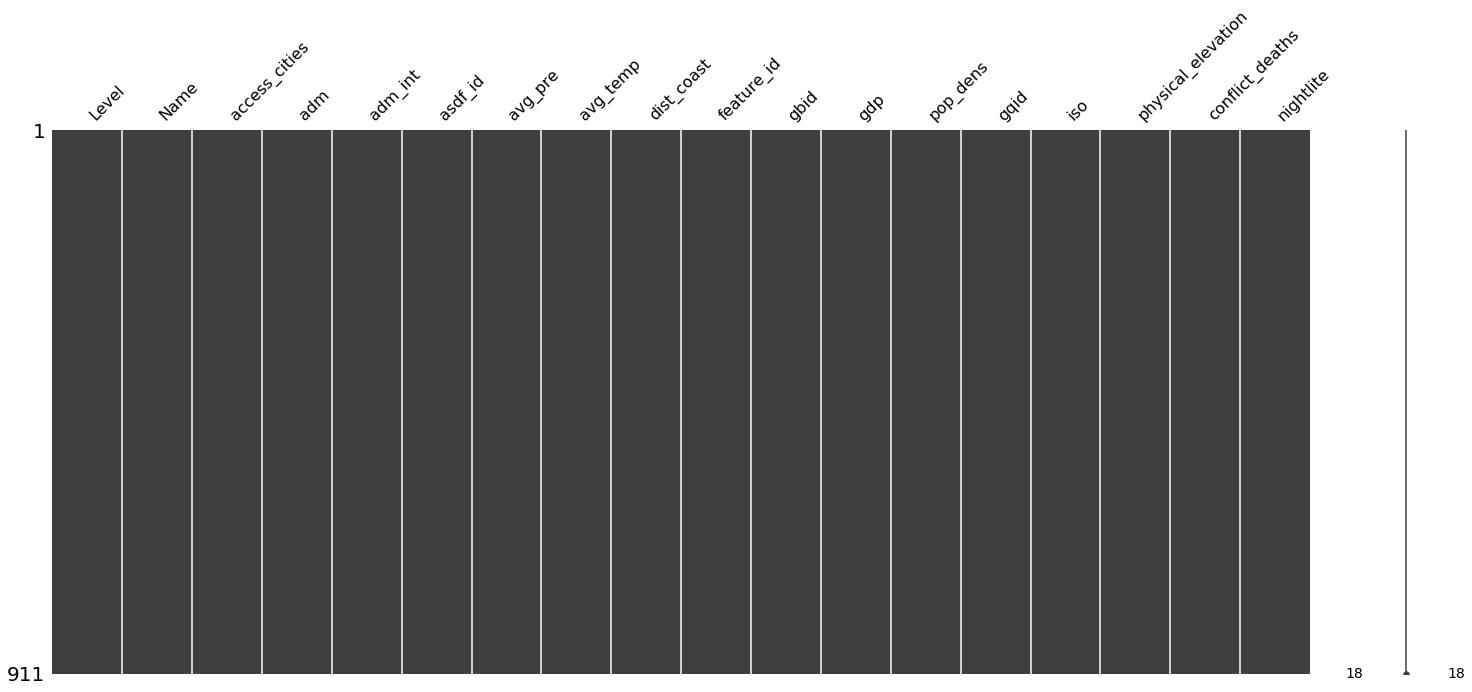

In [10]:
### Check for missing values
import missingno
missingno.matrix(final_csv);

In [11]:
### Load geojson data:
### Tanzania
geotz = gpd.read_file('external_data/geodata/tanzania/TZA_ADM2.geojson')
### Kenya
geoke = gpd.read_file('external_data/geodata/kenya/KEN_ADM3.geojson')
### Uganda
geoug = gpd.read_file('external_data/geodata/uganda/UGA_ADM2.geojson')
### Rwanda
georw = gpd.read_file('external_data/geodata/rwanda/RWA_ADM3.geojson')

### Mering all geofiles to one:
dfs = [geotz, geoke, geoug, georw]
final_geo = pd.concat(dfs, join='outer', axis=0, sort=False)
### Dropping irrelevant column:
final_geo = final_geo.drop(['ISO_Code'], axis=1)
final_geo.head(1)

,id,adm,gbid,Name,Level,adm_int,asdf_id,feature_id,iso,gqid,geometry
0,0,ADM2,TZA_ADM2_1_3_3_0,Bagamoyo,ADM2,2,0,0,TZA,0,"POLYGON ((38.16637 -6.68982, 38.16594 -6.68947..."


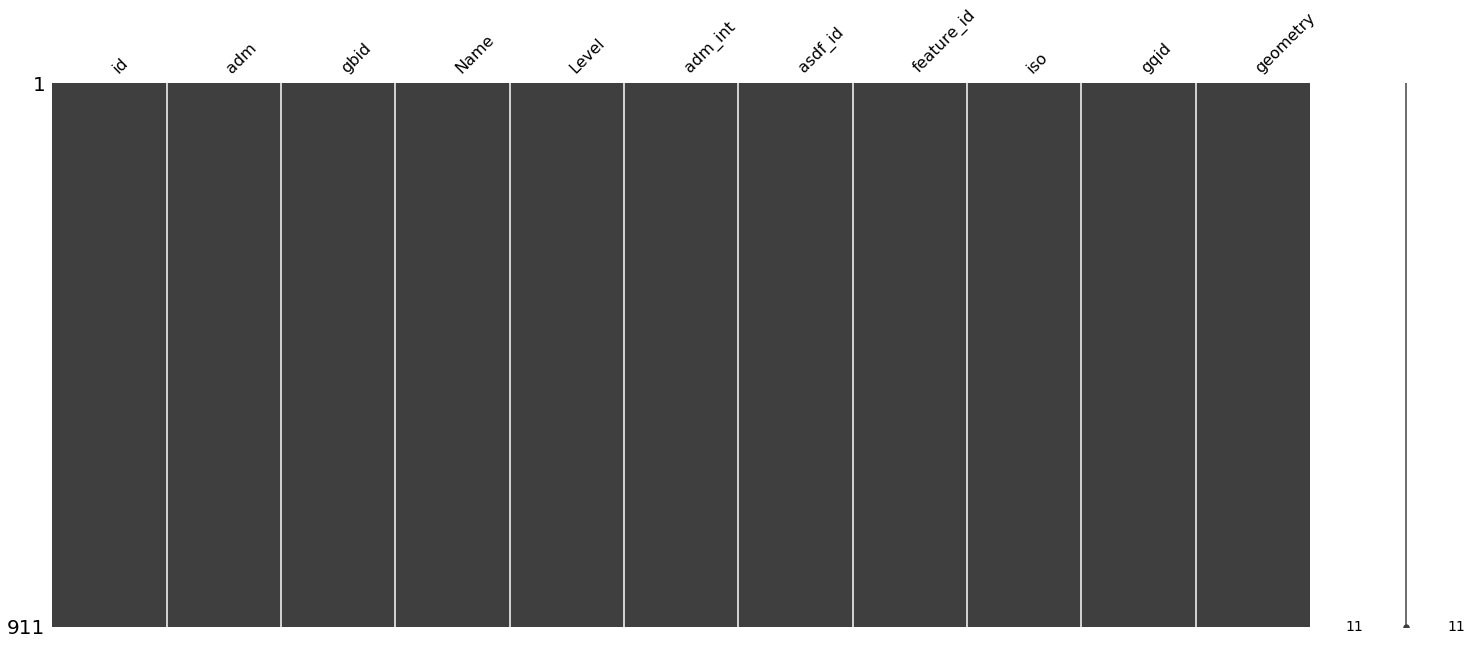

In [12]:
### Check for missing values
missingno.matrix(final_geo);

In [13]:
final_csv.columns

Index(['Level', 'Name', 'access_cities', 'adm', 'adm_int', 'asdf_id',
       'avg_pre', 'avg_temp', 'dist_coast', 'feature_id', 'gbid', 'gdp',
       'pop_dens', 'gqid', 'iso', 'physical_elevation', 'conflict_deaths',
       'nightlite'],
      dtype='object')

In [14]:
####Merge both external dataframes together:
#### Merging with geopandas dataframe on the left, so we get a geopandas dataframe back:
geo = pd.merge(final_geo, 
                final_csv[['gbid', 'iso', 'avg_pre', 'avg_temp', 'dist_coast', 
                           'pop_dens','conflict_deaths','nightlite', 'physical_elevation','gdp', 'access_cities' ]],
                how='left',
                on=['gbid', 'iso'],
                validate='1:1') #validate that it is a 1:1 merge
geo.head(1)

,id,adm,gbid,Name,Level,adm_int,asdf_id,feature_id,iso,gqid,geometry,avg_pre,avg_temp,dist_coast,pop_dens,conflict_deaths,nightlite,physical_elevation,gdp,access_cities
0,0,ADM2,TZA_ADM2_1_3_3_0,Bagamoyo,ADM2,2,0,0,TZA,0,"POLYGON ((38.16637 -6.68982, 38.16594 -6.68947...",72.890916,26.408804,49414.959752,25.266386,0.0,0.192784,228.443757,0.032569,125.102745


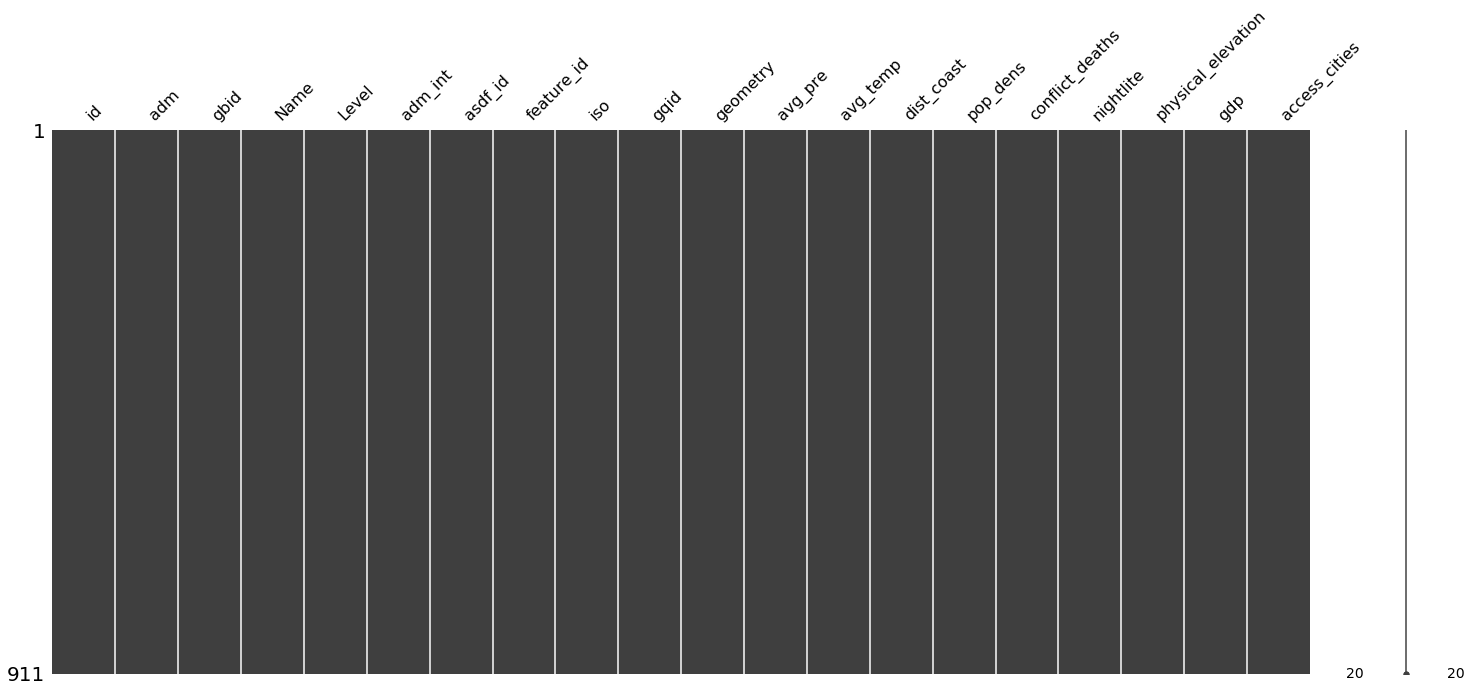

In [15]:
missingno.matrix(geo)

In [16]:
##### Save for future/further work:
#geo.to_csv(r'data/geo_all.csv', index = False, header=True)

In [17]:
######MERGING WITH KIVA DATA######
###BOTH DATAFRAMES HAVE TO BE A GEODATAFRAME IN ORDER TO BE ABLE TO DO THE MERGE###
# Load the data (from Notebook 01 Data Mining & Cleaning):
df_kiva = pd.read_csv('data/kiva_cleaned.csv')
# Create geometry
geometry = [Point(xy) for xy in zip(df_kiva["lon"], df_kiva["lat"])]
# Convert to a geodataframe:
geo_kiva = gpd.GeoDataFrame(df_kiva, geometry = geometry)
# Do the merge:
geo_kiva = gpd.sjoin(geo_kiva, geo,  how="right", op='intersects')
geo_kiva.head(1)

/opt/anaconda3/envs/nf/lib/python3.6/site-packages/geopandas/tools/sjoin.py:61: UserWarning: CRS of frames being joined does not match!(None != {'init': 'epsg:4326'})
  "(%s != %s)" % (left_df.crs, right_df.crs)


,index_left,id_x,funded_amount,loan_amount,activity,sector,country_code,country,region,currency,partner_id,posted_time,disbursed_time,term_in_months,lender_count,borrower_genders,repayment_interval,date,geo_x,lat,lon,mpi_geo,geo_y,mpi,year,exrate,funded_amount_usd,loan_amount_usd,gender,id_y,adm,gbid,Name,Level,adm_int,asdf_id,feature_id,iso,gqid,geometry,avg_pre,avg_temp,dist_coast,pop_dens,conflict_deaths,nightlite,physical_elevation,gdp,access_cities
index_right,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,33758.0,909704.0,225.0,225.0,Clothing Sales,Clothing,TZ,Tanzania,Bagamoyo,TZS,379.0,2015-06-28 09:00:24+00:00,2015-06-10 07:00:00+00:00,8.0,6.0,female,irregular,2015-06-28,"(-6.4456338, 38.898941)",-6.445634,38.898941,"(-6.135729500000001, 39.3621196)","(-6.135729500000001, 39.3621196)",0.143,2015.0,1991.390964,0.112986,0.112986,female,0,ADM2,TZA_ADM2_1_3_3_0,Bagamoyo,ADM2,2,0,0,TZA,0,"POLYGON ((38.16637 -6.68982, 38.16594 -6.68947...",72.890916,26.408804,49414.959752,25.266386,0.0,0.192784,228.443757,0.032569,125.102745


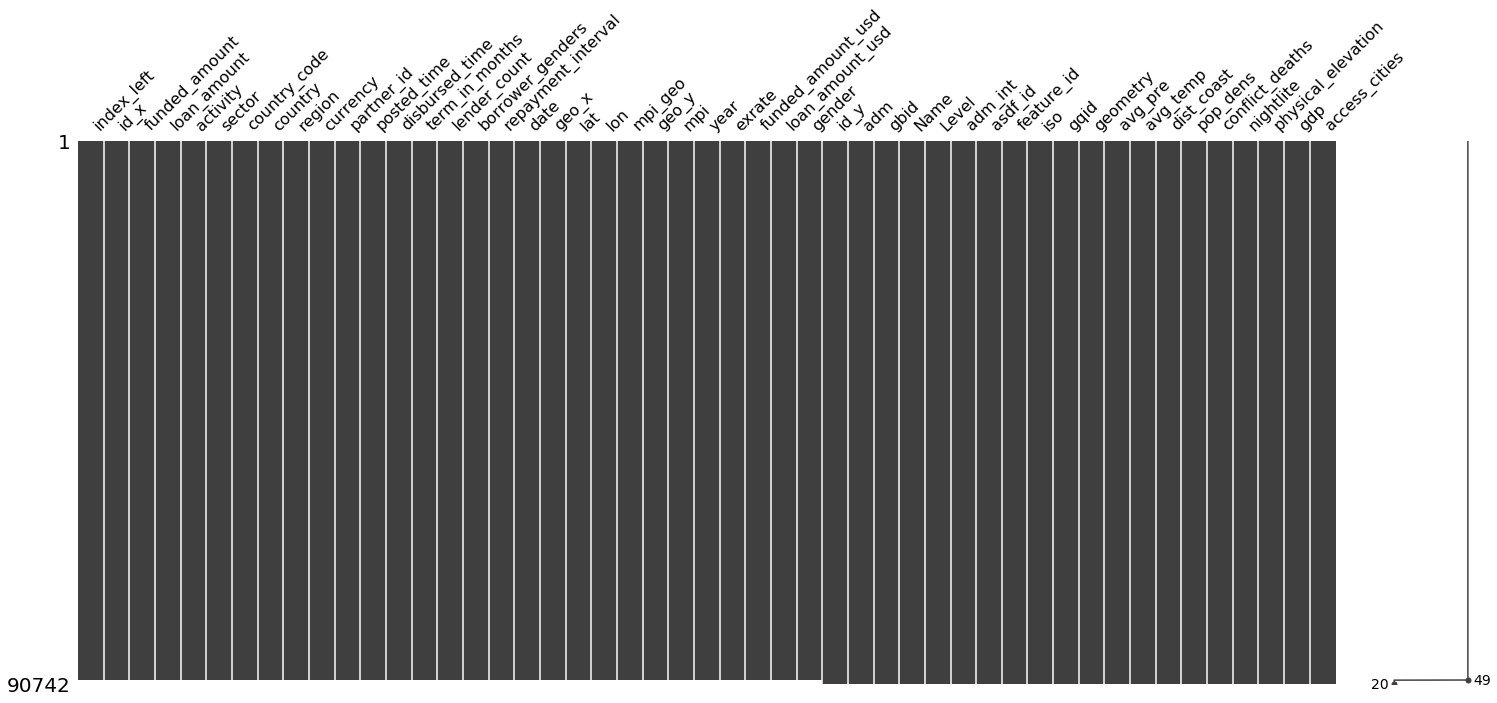

In [18]:
### Check for missing values:
missingno.matrix(geo_kiva);

Observations regarding missing values:
* The merge produced a lot of missing values, they are derived from two different reasons:
    1. There are regions in the external dataset which kiva is not active, therefore they can not be allocated to the kiva dataframe
    2. Geocodes (regions) from the Kiva Dataset are mis-specified (they are not within the bounderies of the 4 countries at hand). These regions are: Mpigi, Uganda and Tala, Kenya
* All the missing values will be deleted (results in a loss of two regions (exactly 300 observations)

In [19]:
geo_kiva = geo_kiva.dropna() # delete all the missing values

In [20]:
geo_kiva.shape

(90046, 49)

### 03.1.2 Geogrpahical EDA

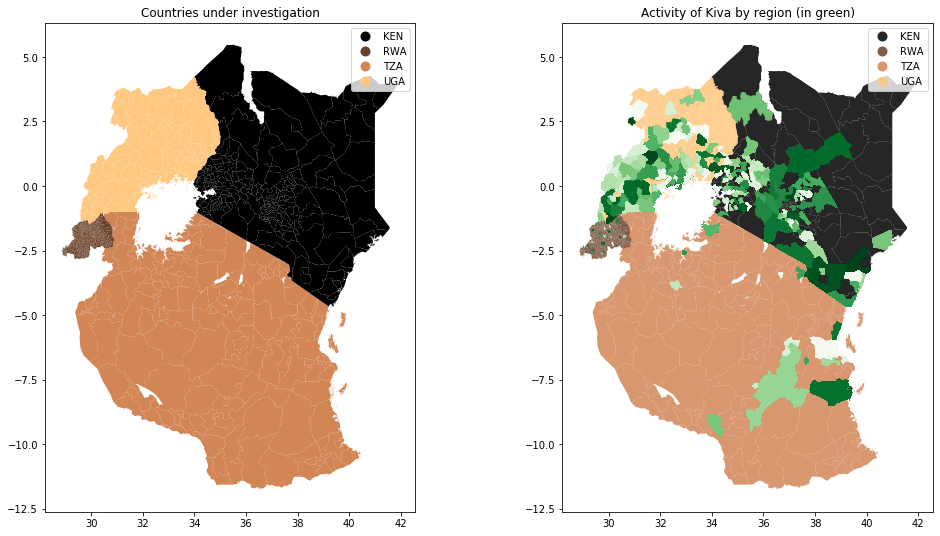

In [21]:
fix, ax = plt.subplots(ncols=2, figsize = (17,9))

geo.plot(ax=ax[0], column='iso', cmap='copper', legend=True)
ax[0].set_title('Countries under investigation')
##no shape file for the whole picture (all countries) found, therefore take the complete dataset geo:
geo.plot(ax=ax[1], column='iso', cmap='copper', legend=True, alpha=0.85)
##draw in the regions kiva is active:
geo_kiva.plot(ax=ax[1], column='region', cmap='Greens')
ax[1].set_title('Activity of Kiva by region (in green)');

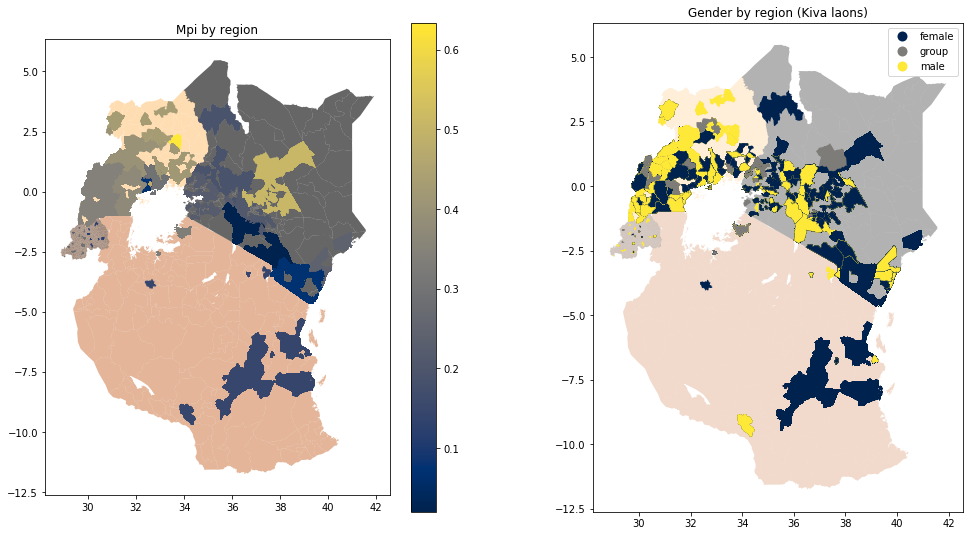

In [22]:
fix, ax = plt.subplots(ncols=2, figsize = (17,9))

geo.plot(ax=ax[0], column='iso', cmap='copper', alpha=0.6, linewidth=1 )
geo_kiva.plot(ax=ax[0], column='mpi', cmap='cividis', legend=True)
ax[0].set_title('Mpi by region')
##no shape file for the whole picture (all countries) found, therefore take the complete dataset geo:
geo.plot(ax=ax[1], column='iso', cmap='copper', alpha=0.3, legend=True)
##draw in the regions kiva is active:
geo_kiva.plot(ax=ax[1], column='gender', cmap='cividis', legend=True)
ax[1].set_title('Gender by region (Kiva laons)');

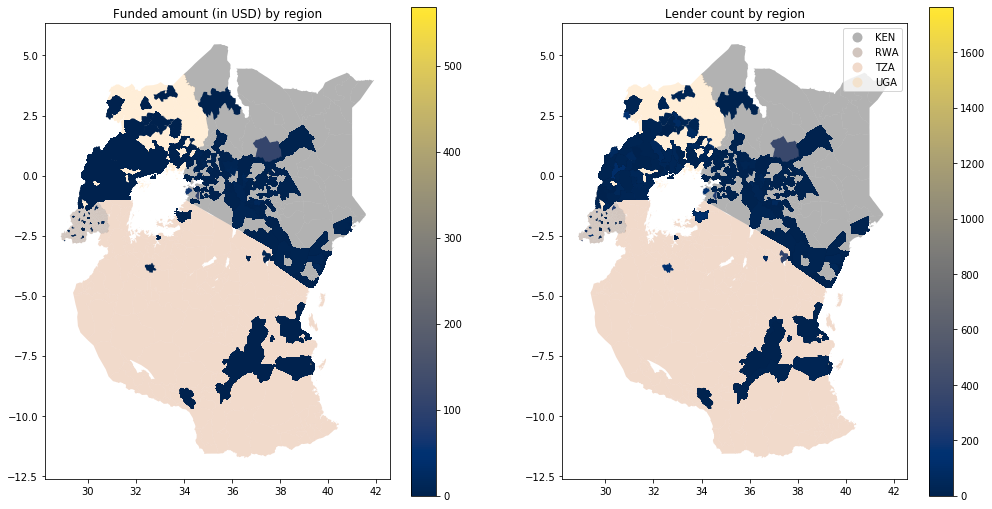

In [23]:
fix, ax = plt.subplots(ncols=2, figsize = (17,9))

geo.plot(ax=ax[0], column='iso', cmap='copper', alpha=0.3)
geo_kiva.plot(ax=ax[0], column='funded_amount_usd', cmap='cividis', legend=True)
ax[0].set_title('Funded amount (in USD) by region')
##no shape file for the whole picture (all countries) found, therefore take the complete dataset geo:
geo.plot(ax=ax[1], column='iso', cmap='copper', alpha=0.3, legend=True)
##draw in the regions kiva is active:
geo_kiva.plot(ax=ax[1], column='lender_count', cmap='cividis', legend=True)
ax[1].set_title('Lender count by region');

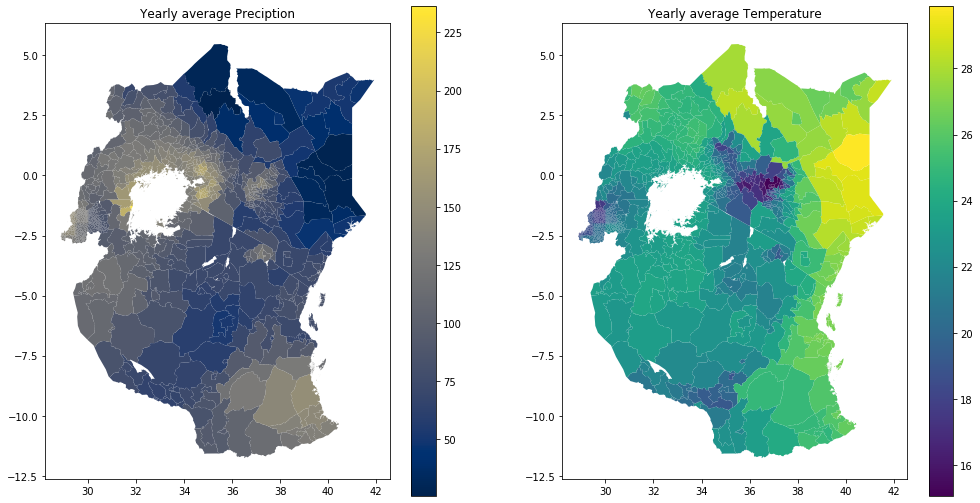

In [24]:
fix, ax = plt.subplots(ncols=2, figsize = (17,9))

geo.plot(ax=ax[0], column='avg_pre', cmap='cividis', legend=True)
ax[0].set_title('Yearly average Preciption')
##no shape file for the whole picture (all countries) found, therefore take the complete dataset geo:
geo.plot(ax=ax[1], column='avg_temp', cmap='viridis', legend=True)
ax[1].set_title('Yearly average Temperature');

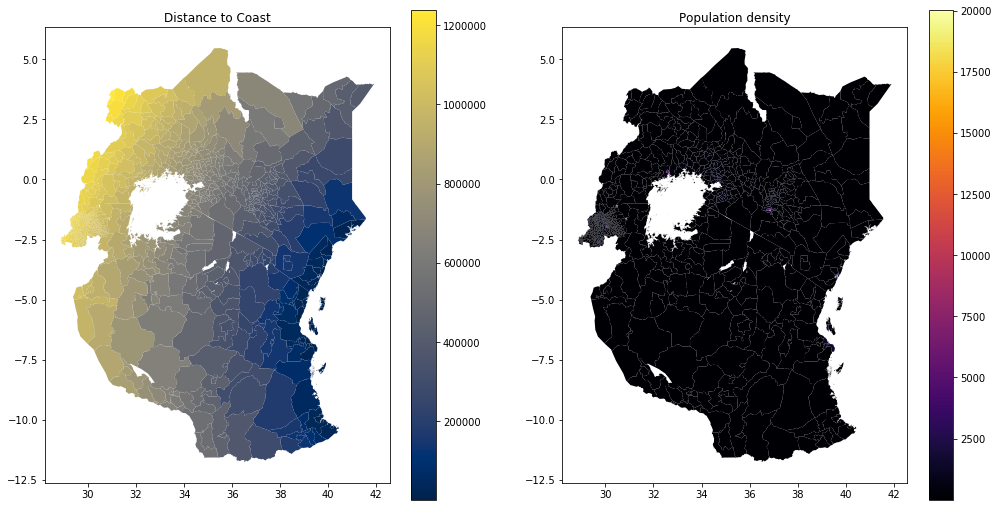

In [25]:
fix, ax = plt.subplots(ncols=2, figsize = (17,9))

geo.plot(ax=ax[0], column='dist_coast', cmap='cividis', legend=True)
ax[0].set_title('Distance to Coast')
##no shape file for the whole picture (all countries) found, therefore take the complete dataset geo:
geo.plot(ax=ax[1], column='pop_dens', cmap='inferno', legend=True)
ax[1].set_title('Population density');

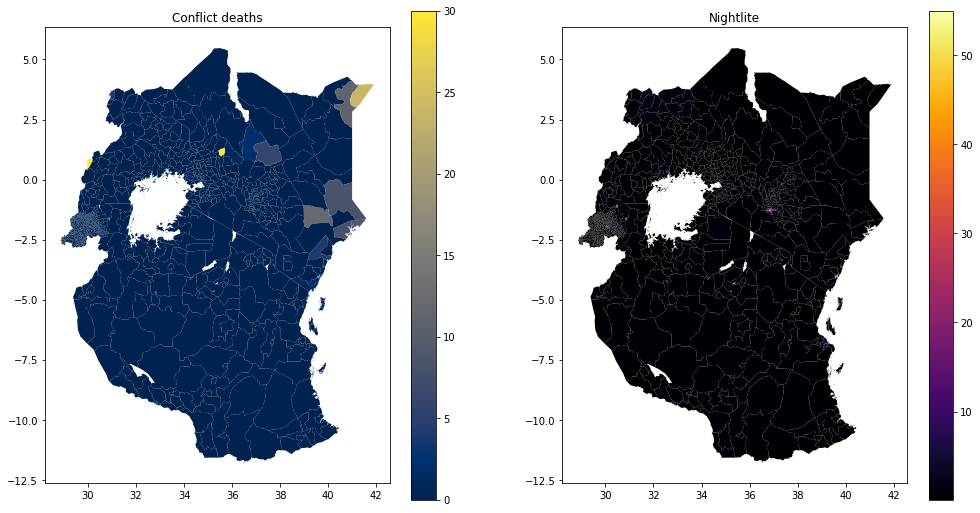

In [26]:
fix, ax = plt.subplots(ncols=2, figsize = (17,9))

geo.plot(ax=ax[0], column='conflict_deaths', cmap='cividis', legend=True)
ax[0].set_title('Conflict deaths')
##no shape file for the whole picture (all countries) found, therefore take the complete dataset geo:
geo.plot(ax=ax[1], column='nightlite', cmap='inferno', legend=True)
ax[1].set_title('Nightlite');

In [27]:
geo.columns

Index(['id', 'adm', 'gbid', 'Name', 'Level', 'adm_int', 'asdf_id',
       'feature_id', 'iso', 'gqid', 'geometry', 'avg_pre', 'avg_temp',
       'dist_coast', 'pop_dens', 'conflict_deaths', 'nightlite',
       'physical_elevation', 'gdp', 'access_cities'],
      dtype='object')

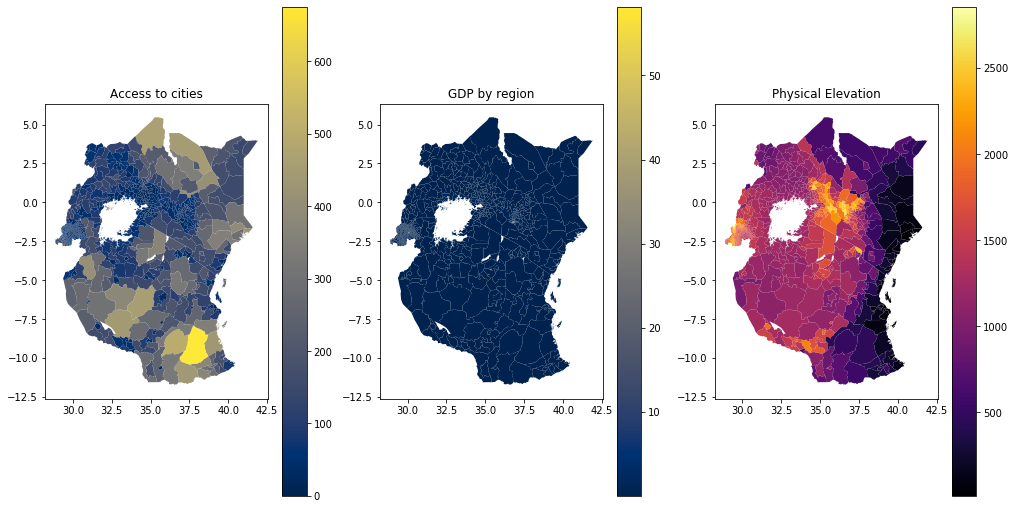

In [28]:
fix, ax = plt.subplots(ncols=3, figsize = (17,9))

geo.plot(ax=ax[0], column='access_cities', cmap='cividis', legend=True)
ax[0].set_title('Access to cities')
##no shape file for the whole picture (all countries) found, therefore take the complete dataset geo:
geo.plot(ax=ax[1], column='gdp', cmap='cividis', legend=True)
ax[1].set_title('GDP by region');
geo.plot(ax=ax[2], column='physical_elevation', cmap='inferno', legend=True)
ax[2].set_title('Physical Elevation');

In [29]:
### change index to kiva loan index:
geo_kiva = geo_kiva.set_index('id_x')

In [30]:
### dropping all the irrelevant columns:
drops=['posted_time', 'disbursed_time','geo_x', 'lat', 'lon','mpi_geo', 'geo_y', 'year','exrate', 
       'funded_amount', 'loan_amount','Level', 'Name', 'adm', 'adm_int',
       'asdf_id', 'feature_id', 'gbid','id_y', 'index_left', 'gqid', 'currency',
       'geometry' #geometry is deleted because of a problem with saving the file
      ]

## 3.2 DHS DATA

**Info:** In this chaptor data from household surveys is being introduced. This notebook contains the steps which are necessary in order to transform and merge the data in a way helpful to the analysis.

**DHS Survey Data:** 'DHS surveys collect primary data using several types of questionnaires. A household questionnaire is used to collect information on household member’s composition, characteristics of the household's dwelling unit, use of insecticide mosquito nets, and a biomarker questionnaires used to collect data related to height and weight,
hemoglobin, malaria, HIV dry blood sample, and other country specific indicators for eligible members in the
household. It is also used to identify members of the household who are eligible for an individual interview.'


It also contains a **wealth index** which is calculated using easy-to-collect data on a household's ownership of selected assets, such as televisions and bicycles; materials used for housing construction; and types of water access and sanitation facilities (so it is simliar to the MPI and can be included as the target variable in the models.

Years data is available (latest years are used):

 - Kenya: 2015
 - Rwanda: 2015
 - Tanzania: 2017
 - Uganda: 2016 (there are newer ones available)

**Structure of the Data:** The data is structured in the following way:
1. Geo-related data with 2 datasets:
    * CSV: Contains a huge amount of additional data regarding geographic issues
    * Shape file with geo coordinates for all household clusters
2. HH-related datasets:
    * Stata file with detailed information for all of the household clusters
    
*Additional remark: All of the data described above is seperated by country, so another important step is to bring the data together into one file*

### 3.2.1  Import and process the Geo-data

In [31]:
#### 1st CSV-files
### Kenya:
geoke = pd.read_csv('external_data/target_variable/kenya_2015/KEGC7BFL/KEGC7BFL.csv')
### Rwanda:
georw = pd.read_csv('external_data/target_variable/rwanda_2015/RWGC72FL/RWGC72FL.csv')
### Tanzania:
geotz = pd.read_csv('external_data/target_variable/tanzania_2017/TZGC7JFL/TZGC7JFL.csv')
### Uganda:
geoug = pd.read_csv('external_data/target_variable/uganda_2016/UGGC7BFL/UGGC7BFL.csv')

### Merging it all to one:
dfs_geo = [geoke, georw, geotz, geoug]
geo_all = pd.concat(dfs_geo, join='inner', axis=0)
geo_all.head(2)

,DHSID,GPS_Dataset,DHSCC,DHSYEAR,DHSCLUST,SurveyID,All_Population_Count_2005,All_Population_Count_2010,All_Population_Count_2015,Annual_Precipitation_2000,Annual_Precipitation_2005,Annual_Precipitation_2010,Annual_Precipitation_2015,Aridity_2000,Aridity_2005,Aridity_2010,Aridity_2015,BUILT_Population_1990,BUILT_Population_2000,BUILT_Population_2014,Day_Land_Surface_Temp_2000,Day_Land_Surface_Temp_2005,Day_Land_Surface_Temp_2010,Day_Land_Surface_Temp_2015,Diurnal_Temperature_Range_2000,Diurnal_Temperature_Range_2005,Diurnal_Temperature_Range_2010,Diurnal_Temperature_Range_2015,Drought_Episodes,Enhanced_Vegetation_Index_1985,Enhanced_Vegetation_Index_1990,Enhanced_Vegetation_Index_1995,Enhanced_Vegetation_Index_2000,Enhanced_Vegetation_Index_2005,Enhanced_Vegetation_Index_2010,Enhanced_Vegetation_Index_2015,Frost_Days_2000,Frost_Days_2005,Frost_Days_2010,Frost_Days_2015,Global_Human_Footprint,Gross_Cell_Production,Growing_Season_Length,Irrigation,ITN_Coverage_2005,ITN_Coverage_2010,ITN_Coverage_2015,Land_Surface_Temperature_2000,Land_Surface_Temperature_2005,Land_Surface_Temperature_2010,Land_Surface_Temperature_2015,Livestock_Cattle,Livestock_Chickens,Livestock_Goats,Livestock_Pigs,Livestock_Sheep,Malaria_Incidence_2000,Malaria_Incidence_2005,Malaria_Incidence_2010,Malaria_Incidence_2015,Malaria_Prevalence_2000,Malaria_Prevalence_2005,Malaria_Prevalence_2010,Malaria_Prevalence_2015,Maximum_Temperature_2000,Maximum_Temperature_2005,Maximum_Temperature_2010,Maximum_Temperature_2015,Mean_Temperature_2000,Mean_Temperature_2005,Mean_Temperature_2010,Mean_Temperature_2015,Minimum_Temperature_2000,Minimum_Temperature_2005,Minimum_Temperature_2010,Minimum_Temperature_2015,Nightlights_Composite,Night_Land_Surface_Temp_2000,Night_Land_Surface_Temp_2005,Night_Land_Surface_Temp_2010,Night_Land_Surface_Temp_2015,PET_2000,PET_2005,PET_2010,PET_2015,Proximity_to_National_Borders,Proximity_to_Protected_Areas,Proximity_to_Water,Rainfall_1985,Rainfall_1990,Rainfall_1995,Rainfall_2000,Rainfall_2005,Rainfall_2010,Rainfall_2015,Slope,SMOD_Population_1990,SMOD_Population_2000,SMOD_Population_2015,Temperature_April,Temperature_August,Temperature_December,Temperature_February,Temperature_January,Temperature_July,Temperature_June,Temperature_March,Temperature_May,Temperature_November,Temperature_October,Temperature_September,Travel_Times_2000,Travel_Times_2015,U5_Population_2000,U5_Population_2005,U5_Population_2010,U5_Population_2015,UN_Population_Count_2000,UN_Population_Count_2005,UN_Population_Count_2010,UN_Population_Count_2015,UN_Population_Density_2000,UN_Population_Density_2005,UN_Population_Density_2010,UN_Population_Density_2015,Wet_Days_2000,Wet_Days_2005,Wet_Days_2010,Wet_Days_2015
0,KE201500000001,KEGE7AFL,KE,2015.0,1.0,KE2015MIS,113869.101562,129908.718750,148340.843750,42.625,40.066669,67.091667,85.666664,11.316372,10.38445,18.011187,24.245283,0.133531,0.160021,0.215034,28.857273,27.983334,26.556667,28.251667,11.966667,12.075,11.416667,11.316667,4.0,3262.0,3265.0,3175.0,3113.0,3391.0,3198.0,3349.0,0.0,0.0,0.0,0.0,74.733333,3506.933105,8.0,5.373755,-9999.0,-9999.0,-9999.0,21.406364,21.209167,20.324167,21.775833,0.0,0.000000,0.0,0.000000,0.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,25.041666,25.425001,25.208334,25.075001,19.033335,19.358334,19.491667,19.4,13.075,13.35,13.791667,13.758333,13.417276,13.955455,14.435,14.091666,15.300,3.766667,3.858333,3.725,3.533333,122424.4192,8673.348791,64698.64892,848.0,1005.0,820.0,562.0,696.0,1049.0,952.0,1.222280,3.0,3.0,3.0,19.608999,16.424999,18.405001,19.617001,18.875000,16.209999,17.188,19.987,18.645000,18.856001,19.093,17.836,12.066667,0.000000,1138.684692,1295.681519,1478.191528,1687.925049,78222.812500,92996.812500,110232.421875,129895.890625,6061.333333,7206.141667,8541.695312,10065.379167,8.816667,8.550833,10.480833,13.119166
1,KE201500000002,KEGE7AFL,KE,2015.0,2.0,KE2015MIS,5898.939453,6729.864258,7684.733398,42.625,40.066669,67.091667,85.666664,11.316372,10.38445,18.01

dazugehörige geocodes: RWGE72FL.shp.xml

In [32]:
#### 2nd Shape files
### Kenya
ke_shp = gpd.read_file('external_data/target_variable/kenya_2015/KEGE7AFL/KEGE7AFL.shp')
### Rwanda
rw_shp = gpd.read_file('external_data/target_variable/rwanda_2015/RWGE72FL/RWGE72FL.shp')
### Tanzania
tz_shp = gpd.read_file('external_data/target_variable/tanzania_2017/TZGE7IFL/TZGE7IFL.shp')
### Uganda
ug_shp = gpd.read_file('external_data/target_variable/uganda_2016/UGGE7AFL/UGGE7AFL.shp')

### Merging it all to one:
dfs_shp = [ke_shp, rw_shp, tz_shp, ug_shp]
shp_all = pd.concat(dfs_shp, join='inner', axis=0)
shp_all.head(2)

,DHSID,DHSCC,DHSYEAR,DHSCLUST,CCFIPS,ADM1FIPS,ADM1FIPSNA,ADM1SALBNA,ADM1SALBCO,ADM1DHS,ADM1NAME,DHSREGCO,DHSREGNA,SOURCE,URBAN_RURA,LATNUM,LONGNUM,ALT_GPS,ALT_DEM,DATUM,geometry
0,KE201500000001,KE,2015.0,1.0,KE,NULL,NULL,NULL,NULL,101.0,NAIROBI,5.0,Low Risk,GPS,U,-1.262753,36.757369,9999.0,1783.0,WGS84,POINT (36.75737 -1.26275)
1,KE201500000002,KE,2015.0,2.0,KE,NULL,NULL,NULL,NULL,101.0,NAIROBI,5.0,Low Risk,GPS,U,-1.338937,36.759522,9999.0,1792.0,WGS84,POINT (36.75952 -1.33894)


In [33]:
#### Merging the csv files and the shape files in one dataframe:
geo_final = pd.merge(geo_all, 
                shp_all[['DHSCLUST','LATNUM','LONGNUM', 'geometry','DHSCC']],
                on=['DHSCLUST','DHSCC'],    #DHSCLUST = Number of cluster (different within countires)
                how='left',                 #DHSCC = Country code
                validate='1:1', #validate that it is a 1:1 merge
               )
geo_final.shape

(1875, 132)

### 3.2.2 Import and process HH-related data:

In [34]:
## Kenya:
hhke_raw = pd.read_stata('external_data/target_variable/kenya_2015/KEHR7ADT/KEHR7AFL.DTA')
## Rwanda:
hhrw_raw = pd.read_stata('external_data/target_variable/rwanda_2015/RWHR70DT/RWHR70FL.DTA')
## Tanzania:
hhtz_raw = pd.read_stata('external_data/target_variable/tanzania_2017/TZHR7IDT/TZHR7IFL.DTA')
## Uganda:
hhug_raw = pd.read_stata('external_data/target_variable/uganda_2016/UGHR7BDT/UGHR7BFL.DTA', convert_categoricals=False)

## show the head examplatory for Uganda:
hhug_raw.head(1)


,hhid,hv000,hv001,hv002,hv003,hv004,hv005,hv006,hv007,hv008,hv008a,hv009,hv010,hv011,hv012,hv013,hv014,hv015,hv016,hv017,hv018,hv019,hv020,hv021,hv022,hv023,hv024,hv025,hv026,hv027,hv028,hv030,hv031,hv032,hv035,hv040,hv041,hv042,hv044,hv045a,hv045b,hv045c,hv046,hv801,hv802,hv803,hv804,hv807d,hv807m,hv807y,hv807c,hv807a,hv201,hv202,hv201a,hv204,hv205,hv206,hv207,hv208,hv209,hv210,hv211,hv212,hv213,hv214,hv215,hv216,hv217,hv218,hv219,hv220,hv221,hv225,hv226,hv227,hv228,hv230a,hv230b,hv232,hv232b,hv232c,hv232d,hv232e,hv232y,hv234,hv234a,hv235,hv236,hv237,hv237a,hv237b,hv237c,hv237d,hv237e,hv237f,hv237g,hv237h,hv237i,hv237j,hv237k,hv237x,hv237z,hv238,hv238a,hv239,hv240,hv241,hv242,hv243a,hv243b,hv243c,hv243d,hv243e,hv244,hv245,hv246,hv246a,hv246b,hv246c,hv246d,hv246e,hv246f,hv246g,hv246h,hv246i,hv246j,hv246k,hv247,hv252,hv253,hv253a,hv253b,hv253c,hv253d,hv253e,hv253f,hv253g,hv253h,hv253x,hv253z,hv270,hv271,hv270a,hv271a,hml1,hml1a,hml2,shdistrict,shdomv,shcapimgr,shchdis,shnumdv,sh118aa,sh120a,sh121g,sh121h,sh121i,sh121j,sh121k,sh121l,sh121m,sh122h,sh125,sh126a,sh144a,sh144b,sh144ca,sh144cb,sh144cc,sh144cd,sh144ce,sh144cx,sa33,hvidx_01,hvidx_02,hvidx_03,hvidx_04,hvidx_05,hvidx_06,hvidx_07,hvidx_08,hvidx_09,hvidx_10,hvidx_11,hvidx_12,hvidx_13,hvidx_14,hvidx_15,hvidx_16,hvidx_17,hvidx_18,hvidx_19,hvidx_20,hvidx_21,hvidx_22,hvidx_23,hvidx_24,hvidx_25,hvidx_26,hvidx_27,hv101_01,hv101_02,hv101_03,hv101_04,hv101_05,hv101_06,hv101_07,hv101_08,hv101_09,hv101_10,hv101_11,hv101_12,hv101_13,hv101_14,hv101_15,hv101_16,hv101_17,hv101_18,hv101_19,hv101_20,hv101_21,hv101_22,hv101_23,hv101_24,hv101_25,hv101_26,hv101_27,hv102_01,hv102_02,hv102_03,hv102_04,hv102_05,hv102_06,hv102_07,hv102_08,hv102_09,hv102_10,hv102_11,hv102_12,hv102_13,hv102_14,hv102_15,hv102_16,hv102_17,hv102_18,hv102_19,hv102_20,hv102_21,hv102_22,hv102_23,hv102_24,hv102_25,hv102_26,hv102_27,hv103_01,hv103_02,hv103_03,hv103_04,hv103_05,hv103_06,hv103_07,hv103_08,hv103_09,hv103_10,hv103_11,hv103_12,hv103_13,hv103_14,hv103_15,hv103_16,hv103_17,hv103_18,hv103_19,hv103_20,hv103_21,hv103_22,hv103_23,hv103_24,hv103_25,hv103_26,hv103_27,hv104_01,hv104_02,hv104_03,hv104_04,hv104_05,hv104_06,hv104_07,hv104_08,hv104_09,hv104_10,hv104_11,hv104_12,hv104_13,hv104_14,hv104_15,hv104_16,hv104_17,hv104_18,hv104_19,hv104_20,hv104_21,hv104_22,hv104_23,hv104_24,hv104_25,hv104_26,hv104_27,hv105_01,hv105_02,hv105_03,hv105_04,hv105_05,hv105_06,hv105_07,hv105_08,hv105_09,hv105_10,hv105_11,hv105_12,hv105_13,hv105_14,hv105_15,hv105_16,hv105_17,hv105_18,hv105_19,hv105_20,hv105_21,hv105_22,hv105_23,hv105_24,hv105_25,hv105_26,hv105_27,hv106_01,hv106_02,hv106_03,hv106_04,hv106_05,hv106_06,hv106_07,hv106_08,hv106_09,hv106_10,hv106_11,hv106_12,hv106_13,hv106_14,hv106_15,hv106_16,hv106_17,hv106_18,hv106_19,hv106_20,hv106_21,hv106_22,hv106_23,hv106_24,hv106_25,hv106_26,hv106_27,hv107_01,hv107_02,hv107_03,hv107_04,hv107_05,hv107_06,hv107_07,hv107_08,hv107_09,hv107_10,hv107_11,hv107_12,hv107_13,hv107_14,hv107_15,hv107_16,hv107_17,hv107_18,hv107_19,hv107_20,hv107_21,hv107_22,hv107_23,hv107_24,hv107_25,hv107_26,hv107_27,hv108_01,hv108_02,hv108_03,hv108_04,hv108_05,hv108_06,hv108_07,hv108_08,hv108_09,hv108_10,hv108_11,hv108_12,hv108_13,hv108_14,hv108_15,hv108_16,hv108_17,hv108_18,hv108_19,hv108_20,hv108_21,hv108_22,hv108_23,hv108_24,hv108_25,hv108_26,hv108_27,hv109_01,hv109_02,hv109_03,hv109_04,hv109_05,hv109_06,hv109_07,hv109_08,hv109_09,hv109_10,hv109_11,hv109_12,hv109_13,hv109_14,hv109_15,hv109_16,hv109_17,hv109_18,hv109_19,hv109_20,hv109_21,hv109_22,hv109_23,hv109_24,hv109_25,hv109_26,hv109_27,hv110_01,hv110_02,hv110_03,hv110_04,hv110_05,hv110_06,hv110_07,hv110_08,hv110_09,hv110_10,hv110_11,hv110_12,hv110_13,hv110_14,hv110_15,hv110_16,hv110_17,hv110_18,hv110_19,hv110_20,hv110_21,hv110_22,hv110_23,hv110_24,hv110_25,hv110_26,hv110_27,hv111_01,hv111_02,hv111_03,hv111_04,hv111_05,hv111_06,hv111_07,hv111_08,hv111_09,hv111_10,hv111_11,hv111_12,hv111_13,hv111_14,hv111_15,hv111_16,hv111_17,hv111_18,hv111_19,hv111_20,hv111_

**Important features of the dataset:**

* Regarding target variable (y):
   * hv270 - quantiles (country-wise): Labeling into 5 categories: richest, richer, middle, poorer, poorest
   * hv271 - Wealth index factor score (5 decimals) 
* Variables needed to merge with geocodes:
   * hv009 - Total number of household members indicates the number of entries to be found in the dataset 
   * hv001 - Cluster number: key to join the datasets
   

In [35]:
## In order being able to merge the 2 big datasets together it is important to 
## introduce a new column with the corresponding country_code
hhke_raw.insert(0, 'DHSCC', 'KE')
hhrw_raw.insert(0, 'DHSCC', 'RW') 
hhtz_raw.insert(0, 'DHSCC', 'TZ')
hhug_raw.insert(0, 'DHSCC', 'UG')
### Merging the hh-related data to one dataframe:
hh_data = [hhke_raw, hhrw_raw, hhtz_raw, hhug_raw]
hh_all = pd.concat(hh_data, join='inner', axis=0)

In [36]:
hh_all.shape # printing out the shape of the dataset before the merge for an additional check

(48098, 820)

### 3.2.3 Merging both together:

In [37]:
## Merging geo-data and hh-related data into one dataframe:
hh_all = pd.merge(hh_all, 
                geo_final,
                left_on=['hv001', 'DHSCC'], # HH-Cluster and Country_Code 
                right_on=['DHSCLUST','DHSCC'], # HH-Cluster and Country_Code
                how='left',
                validate='m:1',
               )
hh_all.shape # printing out the shape of the merged dataframe in order to further check for unwanted behavoiur

(48098, 951)

In [38]:
### Selecting variables which I need for my analysis:
hh_data = hh_all[['hhid', #HH ID
                    'hv009',#Number of HH members
                    'hv001',#Cluster number to merge
                    'hv270',#labeling wealth
                    'hv271' ,#Wealth Index score
                    'DHSCC' ,#Country Code
                    'LATNUM','LONGNUM','geometry']] #geocodes
hh_data.head(1)

,hhid,hv009,hv001,hv270,hv271,DHSCC,LATNUM,LONGNUM,geometry
0,001002,1,1,richer,12084,KE,-1.262753,36.757369,POINT (36.75737 -1.26275)


In [39]:
hh_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48098 entries, 0 to 48097
Data columns (total 9 columns):
hhid        48098 non-null object
hv009       48098 non-null int8
hv001       48098 non-null int16
hv270       48098 non-null object
hv271       48098 non-null int32
DHSCC       48098 non-null object
LATNUM      48098 non-null float64
LONGNUM     48098 non-null float64
geometry    48098 non-null geometry
dtypes: float64(2), geometry(1), int16(1), int32(1), int8(1), object(3)
memory usage: 2.9+ MB


In [40]:
###### Save dataframe for further work 
###hh_final.to_csv('data/hh_data.csv')

### 3.2.3 Performe kNN Classifier to bring kiva and hh-data  together:

#### Preprocessing

In [41]:
type(hh_data) 

pandas.core.frame.DataFrame

In [42]:
### Convert the hh_data dataframe to a geopoandas df
# Creating geo points from lon and lat:
from shapely.geometry import Point
geometry = [Point(xy) for xy in zip(hh_data["LONGNUM"], hh_data["LATNUM"])]
# Creating geo data frame:
geo_hh = gpd.GeoDataFrame(hh_data, geometry=geometry)
type(geo_hh)

geopandas.geodataframe.GeoDataFrame

In [43]:
## rename the DHSCC column in order to have consistent names for kiva- and HH datasets
geo_hh.rename(columns={'DHSCC':'country_code'}, inplace=True)
geo_hh.head(1)

,hhid,hv009,hv001,hv270,hv271,country_code,LATNUM,LONGNUM,geometry
0,001002,1,1,richer,12084,KE,-1.262753,36.757369,POINT (36.75737 -1.26275)


In [44]:
## Import Kiva data and convert to geopandas df:
df_kiva = pd.read_csv('data/kiva_cleaned.csv')
# Create geometry
geometry = [Point(xy) for xy in zip(df_kiva["lon"], df_kiva["lat"])]
# Convert to a geodataframe:
geo_kiva_point = gpd.GeoDataFrame(df_kiva, geometry = geometry)
type(geo_kiva_point)

geopandas.geodataframe.GeoDataFrame

#### kNN-Classifier Model:

#### it also serves as a test on the correctness of the geocodes provided by kiva

In [45]:
from sklearn.neighbors import KNeighborsClassifier
# 1. Define the Classifier:
neigh = KNeighborsClassifier(n_neighbors=1 , metric='haversine', n_jobs=-1)
# 2. fit the model on the Clusters provided by DHS
neigh.fit(np.radians(geo_hh[['LATNUM', 'LONGNUM']]), geo_hh['hv001'])
# 3. Create a new column in the kiva-data which determines the nearest HH-cluster:
geo_kiva_point['hv001'] = neigh.predict(np.radians(geo_kiva_point[['lat','lon']])) 

In [46]:
# 4. Make a table to check the accuracy of the model:
precision_knn0 = pd.merge(geo_kiva_point[['id','country','lat','lon','hv001','country_code', 'region']],
                         geo_hh[['hv001','LATNUM','LONGNUM','country_code']], 
                         how='left', 
                         on=['hv001', 'country_code'])

# 5. calculate the distances from Kiva loan region and HH-Cluster:
lat1 = np.radians(precision_knn0['lat'])
lat2 = np.radians(precision_knn0['LATNUM'])
lon1 = np.radians(precision_knn0['lon'])
lon2 = np.radians(precision_knn0['LONGNUM'])
temp = np.power((np.sin((lat2-lat1)/2)),2) + np.cos(lat1) * np.cos(lat2) * np.power((np.sin((lon2-lon1)/2)),2)
precision_knn0['distance_km'] = 6371 * (2 * np.arcsin(np.sqrt(temp)))

## If I want to implement this code i have to reference it, because it is more or less 1:1 copied from Kaggle/Kiva
precision_knn0 = precision_knn0.drop_duplicates('id')
## Deriving the median distance
precision_knn0.distance_km.median()

3.0535904604550437

* The **median distance** from the kiva loan region to the matched Household cluster is **3 km**, which is really good.
* But lets have a look at the observations which do have a high distance (defined as higher as 75 km)

#### Troubleshooting - Long distances

In [47]:
prob_mistake = precision_knn0[precision_knn0.distance_km > 75]
prob_mistake.region.value_counts()

Busia           265
Oloitoktok       93
Kalile ;Tala      4
Kigali            1
Masaka            1
Name: region, dtype: int64

* Overall 5 regions seem to have a high distance, so its worth to have a closer look at the geocodes, maybe they are mis-specified

In [48]:
prob_mistake = prob_mistake.drop_duplicates('region')
prob_mistake

,id,country,lat,lon,hv001,country_code,region,LATNUM,LONGNUM,distance_km
43915,667627,Kenya,0.460769,34.111462,220,KE,Busia,-0.689432,35.180565,174.611466
84000,677682,Kenya,-2.924172,37.504116,21,KE,Oloitoktok,-0.672902,37.354064,250.884639
457215,790492,Uganda,-1.970579,30.104429,373,UG,Kigali,2.095454,32.536942,526.825164
498382,802244,Rwanda,-0.326738,31.753740,83,RW,Masaka,-2.516338,29.479797,350.949097
960362,925063,Kenya,22.540796,88.346842,121,KE,Kalile ;Tala,3.936035,41.855957,5409.359131


In [49]:
from geopy.geocoders import GeoNames
from geopy.extra.rate_limiter import RateLimiter
from shapely.geometry import Point, Polygon

# 0.1 Change the region name in order to find it via geopy:
prob_mistake['region'] = prob_mistake['region'].map({'Kalile ;Tala':'Tala, Kenya', 
                                                     'Oloitoktok':'Loitokitok, Kenya',
                                                     'Busia':'Busia, Kenya',
                                                     'Kigali':'Kigali, Uganda',
                                                     'Masaka':'Masaka, Rwanda'
                                                    })
prob_mistake                                           

,id,country,lat,lon,hv001,country_code,region,LATNUM,LONGNUM,distance_km
43915,667627,Kenya,0.460769,34.111462,220,KE,"Busia, Kenya",-0.689432,35.180565,174.611466
84000,677682,Kenya,-2.924172,37.504116,21,KE,"Loitokitok, Kenya",-0.672902,37.354064,250.884639
457215,790492,Uganda,-1.970579,30.104429,373,UG,"Kigali, Uganda",2.095454,32.536942,526.825164
498382,802244,Rwanda,-0.326738,31.753740,83,RW,"Masaka, Rwanda",-2.516338,29.479797,350.949097
960362,925063,Kenya,22.540796,88.346842,121,KE,"Tala, Kenya",3.936035,41.855957,5409.359131


In [50]:
# 0.2 define the geo service:
locator = GeoNames(username='stefanwoba', user_agent='myGeocoder') #GeoNames is the geoservice provider
# 1 - conveneint function to delay between geocoding calls 
##(otherwise there is an opportunity that the geoservice provider is cancellin your session)
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
# 2- - create location column
prob_mistake['location'] = prob_mistake['region'].apply(geocode)
# 3 - create longitude, laatitude and altitude from location column (returns tuple)
prob_mistake['point'] = prob_mistake['location'].apply(lambda loc: tuple(loc.point) if loc else None)
# 4 - split point column into latitude, longitude and altitude columns
prob_mistake[['lat_new', 'lon_new', 'attitude']] = pd.DataFrame(prob_mistake['point'].tolist(), index=prob_mistake.index)
# 5 - drop attitude (not relevant for this analysis)
prob_mistake = prob_mistake.drop(['attitude', 'location', 'point'], axis=1)
# 6 - Check the outcome:
prob_mistake

,id,country,lat,lon,hv001,country_code,region,LATNUM,LONGNUM,distance_km,lat_new,lon_new
43915,667627,Kenya,0.460769,34.111462,220,KE,"Busia, Kenya",-0.689432,35.180565,174.611466,0.35000,34.17000
84000,677682,Kenya,-2.924172,37.504116,21,KE,"Loitokitok, Kenya",-0.672902,37.354064,250.884639,-2.90103,37.51816
457215,790492,Uganda,-1.970579,30.104429,373,UG,"Kigali, Uganda",2.095454,32.536942,526.825164,NaN,NaN
498382,802244,Rwanda,-0.326738,31.753740,83,RW,"Masaka, Rwanda",-2.516338,29.479797,350.949097,-2.02226,30.20316
960362,925063,Kenya,22.540796,88.346842,121,KE,"Tala, Kenya",3.936035,41.855957,5409.359131,-1.26849,37.32186


**Conclusions:**
   * The geocodes for Busia and Oloitoktok seem to be correct -> therefore it will remain in the analysis, even so the distance is quite large
   * There seems to be an error for Kigali, Uganda (Kigali is in Rwanda) and for Massaka in Rwanda (it is actually based in Uganda)
   * Due to uncertainty which column is miss specified and the number of observations are small (1 each), I will just delete them
   * Tala, Kenya has wrong geocodes but due to the limited number of observations, I will also just delete them
   * *This is done on previous code*

In [51]:
#### Deleting some observations due to uncertainty about correctness of the geocode data:
geo_kiva_point = geo_kiva_point.drop(geo_kiva_point[geo_kiva_point.region=='Kalile ;Tala'].index, axis=0)
geo_kiva_point = geo_kiva_point.drop(geo_kiva_point[(geo_kiva_point.region=='Kigali') & (geo_kiva_point.country=='Uganda')].index, axis=0)
geo_kiva_point = geo_kiva_point.drop(geo_kiva_point[(geo_kiva_point.region=='Masaka') & (geo_kiva_point.country=='Rwanda')].index, axis=0)

In [52]:
#In order to ensure consistency between datasets the kNN Classifier will be run again on the cleaned data:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1 , metric='haversine', n_jobs=-1)
neigh.fit(np.radians(geo_hh[['LATNUM', 'LONGNUM']]), geo_hh['hv001']) #fit the model on the Clusters provided by DHS
geo_kiva_point['hv001'] = neigh.predict(np.radians(geo_kiva_point[['lat','lon']]))

In [53]:
# Updated table:
precision_knn = pd.merge(geo_kiva_point[['id','country','lat','lon','hv001','country_code', 'region']],
                         geo_hh[['hv001','LATNUM','LONGNUM','country_code', 'hv270', 'hv271']], 
                         how='left', 
                         on=['hv001', 'country_code'])
                         
lat1 = np.radians(precision_knn['lat'])
lat2 = np.radians(precision_knn['LATNUM'])
lon1 = np.radians(precision_knn['lon'])
lon2 = np.radians(precision_knn['LONGNUM'])
temp = np.power((np.sin((lat2-lat1)/2)),2) + np.cos(lat1) * np.cos(lat2) * np.power((np.sin((lon2-lon1)/2)),2)
precision_knn['distance_km'] = 6371 * (2 * np.arcsin(np.sqrt(temp)))

## If I want to implement this code i have to reference it, because it is more or less 1:1 copied from Kaggle/Kiva
precision_knn = precision_knn.drop_duplicates('id')
## Deriving the median distance
precision_knn.distance_km.median()

3.0535904604550437

In [54]:
precision_knn.head(1)

,id,country,lat,lon,hv001,country_code,region,LATNUM,LONGNUM,hv270,hv271,distance_km
0,653185,Kenya,-3.39731,38.555934,73,KE,Voi,-3.381375,38.582165,richer,19062,3.40848


In [55]:
precision_knn.shape

(90340, 12)

#### Plot the results for confirmation by the example of Rwanda:

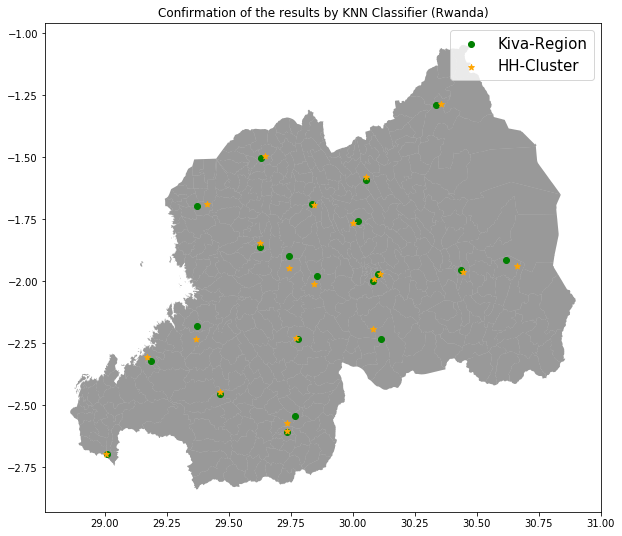

In [56]:
#1. drop duplicates (in terms of regions) in order to ensure a clean picture
check = precision_knn.drop_duplicates('region')
#2. select observations for Rwanda:
check_rw = check[check.country_code=='RW']
#3. Derive a geodataframe for the Kiva geocodes
kiva_check = check_rw.drop(['LATNUM', 'LONGNUM'], axis=1)
## Create geometry
geometry = [Point(xy) for xy in zip(kiva_check["lon"], kiva_check["lat"])]
## Convert to a geodataframe:
kiva_check = gpd.GeoDataFrame(kiva_check, geometry = geometry)
#4. Derive a geodataframe for the Household (DHS) geocodes
hh_check = check_rw.drop(['lat', 'lon'], axis=1)
## Create geometry
geometry = [Point(xy) for xy in zip(hh_check["LONGNUM"], hh_check["LATNUM"])]
## Convert to a geodataframe:
hh_check = gpd.GeoDataFrame(hh_check, geometry = geometry)

#5. Load in the shapefile for Rwanda
rwanda_map = gpd.read_file('external_data/target_variable/rwanda_2015/rwa_adm_2006_nisr_wgs1984_20181002_shp/rwa_adm3_2006_NISR_WGS1984_20181002.shp')
#6. Make the plot:
fig, ax = plt.subplots(figsize = (14,9))
rwanda_map.plot(ax = ax, alpha = 0.4, color ="black")
kiva_check.plot(ax=ax,  color='green', marker="o", label='Kiva-Region')
hh_check.plot(ax=ax, color='orange', marker='*', label='HH-Cluster')
ax.set_title('Confirmation of the results by KNN Classifier (Rwanda)')
ax.legend(prop={"size": 15});

In [57]:
#knn = folium.Map(
    #location=[-3, 37.578603],
    #zoom_start=5,
    #tiles='Stamen Terrain'
#)

#for point in range(0, len(locationlist)):
    #folium.Marker(locationlist[point]).add_to(knn)
#knn

## 3.3 Merging all the data together

In [58]:
result_knn = precision_knn.copy()
result_knn.head(1)

,id,country,lat,lon,hv001,country_code,region,LATNUM,LONGNUM,hv270,hv271,distance_km
0,653185,Kenya,-3.39731,38.555934,73,KE,Voi,-3.381375,38.582165,richer,19062,3.40848


In [59]:
geo_kiva_point.head(1)

,id,funded_amount,loan_amount,activity,sector,country_code,country,region,currency,partner_id,posted_time,disbursed_time,term_in_months,lender_count,borrower_genders,repayment_interval,date,geo_x,lat,lon,mpi_geo,geo_y,mpi,year,exrate,funded_amount_usd,loan_amount_usd,gender,geometry,hv001
0,653185,250.0,250.0,Fruits & Vegetables,Food,KE,Kenya,Voi,KES,164.0,2014-01-02 06:59:33+00:00,2013-12-12 08:00:00+00:00,13.0,7,female,irregular,2014-01-02,"(-3.3973104, 38.5559336)",-3.39731,38.555934,"(-4.0627412, 39.6771481)","(-4.0627412, 39.6771481)",0.075,2014,87.9225,2.843413,2.843413,female,POINT (38.55593 -3.39731),73


In [60]:
##### First: merging kiva loan with household data (imortant hv270 and hv271)
kiva_hh = pd.merge(geo_kiva_point,
                   result_knn[['id', 'hv270', 'hv271']], #id for merge, hv270 & 271 as the new target variable
                   how='left',
                   on='id',
                   validate='1:1')
kiva_hh.head(1)

,id,funded_amount,loan_amount,activity,sector,country_code,country,region,currency,partner_id,posted_time,disbursed_time,term_in_months,lender_count,borrower_genders,repayment_interval,date,geo_x,lat,lon,mpi_geo,geo_y,mpi,year,exrate,funded_amount_usd,loan_amount_usd,gender,geometry,hv001,hv270,hv271
0,653185,250.0,250.0,Fruits & Vegetables,Food,KE,Kenya,Voi,KES,164.0,2014-01-02 06:59:33+00:00,2013-12-12 08:00:00+00:00,13.0,7,female,irregular,2014-01-02,"(-3.3973104, 38.5559336)",-3.39731,38.555934,"(-4.0627412, 39.6771481)","(-4.0627412, 39.6771481)",0.075,2014,87.9225,2.843413,2.843413,female,POINT (38.55593 -3.39731),73,richer,19062


In [61]:
# Do the merge with  external data (weather, and so on):
geo_kiva_hh = gpd.sjoin(kiva_hh, geo,  how="right", op='intersects')

/opt/anaconda3/envs/nf/lib/python3.6/site-packages/geopandas/tools/sjoin.py:61: UserWarning: CRS of frames being joined does not match!(None != {'init': 'epsg:4326'})
  "(%s != %s)" % (left_df.crs, right_df.crs)


#### Cleaning the dataframe

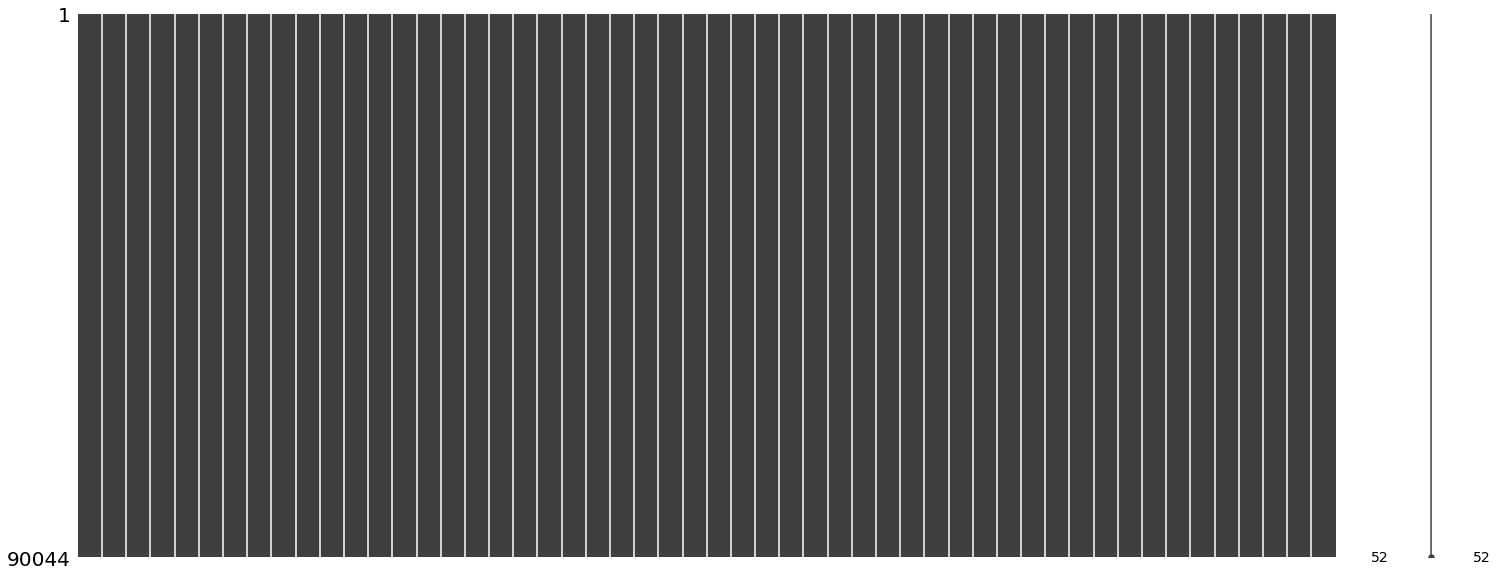

In [62]:
### Drop nas which were generated during sjoin and check for missing values:
geo_kiva_hh = geo_kiva_hh.dropna()
missingno.matrix(geo_kiva_hh);

In [63]:
### change index delete the columns not needed in further analysis:
geo_kiva_hh = geo_kiva_hh.set_index('index_left')
drops = ['id_x', 'funded_amount', 'loan_amount', 'country', 'currency', 'loan_amount',
         'geo_x', 'mpi_geo', 'geo_y', 'mpi', 'exrate', 'Name', 'adm', 'adm_int', 'feature_id', 'gbid', 'gqid',
         'id_y', 'iso']
geo_kiva_hh = geo_kiva_hh.drop(drops, axis=1)
geo_kiva_hh.head(1)

,activity,sector,country_code,region,partner_id,posted_time,disbursed_time,term_in_months,lender_count,borrower_genders,repayment_interval,date,lat,lon,year,funded_amount_usd,loan_amount_usd,gender,hv001,hv270,hv271,Level,asdf_id,geometry,avg_pre,avg_temp,dist_coast,pop_dens,conflict_deaths,nightlite,physical_elevation,gdp,access_cities
index_left,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
29478.0,Grocery Store,Food,TZ,Bagamoyo,379.0,2015-05-06 09:44:00+00:00,2015-04-24 07:00:00+00:00,8.0,6.0,female,irregular,2015-05-06,-6.445634,38.898941,2015.0,0.138094,0.138094,female,62.0,richest,128721.0,ADM2,0,"POLYGON ((38.16637 -6.68982, 38.16594 -6.68947...",72.890916,26.408804,49414.959752,25.266386,0.0,0.192784,228.443757,0.032569,125.102745


In [64]:
### Save dataframe for further work (modeling)
#### Convert to pandas dataframe and drop geometry:
kiva_save = pd.DataFrame(geo_kiva_hh.drop(columns='geometry'))
#### Save to file
kiva_save.to_csv(r'data/kiva_hh.csv', index = False, header=True)

### Making interactive maps with folium:


**Important:**
Showing maps created by folium within the jupyter notebook is not possible, because it gets way too big, therefore export it to a html file instead.

In [65]:
geo.to_file('final_geo.geojson', driver='GeoJSON')

In [66]:
final_geo = gpd.read_file('final_geo.geojson')

In [67]:
final_geo.columns

Index(['id', 'adm', 'gbid', 'Name', 'Level', 'adm_int', 'asdf_id',
       'feature_id', 'iso', 'gqid', 'avg_pre', 'avg_temp', 'dist_coast',
       'pop_dens', 'conflict_deaths', 'nightlite', 'physical_elevation', 'gdp',
       'access_cities', 'geometry'],
      dtype='object')

In [68]:
final_csv.head(5)

,Level,Name,access_cities,adm,adm_int,asdf_id,avg_pre,avg_temp,dist_coast,feature_id,gbid,gdp,pop_dens,gqid,iso,physical_elevation,conflict_deaths,nightlite
0,ADM2,Bagamoyo,125.102745,ADM2,2,0,72.890916,26.408804,49414.959752,0,TZA_ADM2_1_3_3_0,0.032569,25.266386,0,TZA,228.443757,0.0,0.192784
1,ADM2,Bariadi,208.188586,ADM2,2,1,85.210798,22.709856,593879.251148,1,TZA_ADM2_1_3_3_1,0.039866,62.247063,1,TZA,1397.736922,0.0,0.666162
2,ADM2,Chunya,443.887008,ADM2,2,2,68.710584,22.100773,653603.658882,2,TZA_ADM2_1_3_3_2,0.006065,10.791717,2,TZA,1276.919637,0.0,0.442000
3,ADM2,Geita,75.545742,ADM2,2,3,102.266276,23.218936,806125.113951,3,TZA_ADM2_1_3_3_3,0.139157,155.718972,3,TZA,1245.520747,0.0,0.252875
4,ADM2,Iramba,108.290394,ADM2,2,4,72.120892,23.206947,527565.541653,4,TZA_ADM2_1_3_3_4,0.042734,48.365822,4,TZA,1260.742708,0.0,0.165557


In [69]:
import folium
m = folium.Map(
    location=[-3, 37.578603],
    zoom_start=5,
    tiles='Stamen Terrain'
)

folium.Choropleth(
    geo_data=final_geo,
    name='Average Temperature (in Celsius)',
    data=final_csv,
    columns=['Name', 'avg_temp'],
    key_on='feature.properties.Name',
    fill_color='YlOrRd',
    fill_opacity=0.5,
    line_opacity=0.5,
    legend_name='Average Temperature',
    layer=True,
    show=False
     ).add_to(m)

folium.LayerControl().add_to(m);

## 3.5 Alternative Approach - Use HH data and external data for the model

In [70]:
geo_hh.head # HH Data with points as geometry


,id,adm,gbid,Name,Level,adm_int,asdf_id,feature_id,iso,gqid,geometry,avg_pre,avg_temp,dist_coast,pop_dens,conflict_deaths,nightlite,physical_elevation,gdp,access_cities
0,0,ADM2,TZA_ADM2_1_3_3_0,Bagamoyo,ADM2,2,0,0,TZA,0,"POLYGON ((38.16637 -6.68982, 38.16594 -6.68947...",72.890916,26.408804,49414.959752,25.266386,0.0,0.192784,228.443757,0.032569,125.102745


In [71]:
geo.shape

(911, 20)

In [72]:
geo_hh.shape

(48098, 9)

In [73]:
geo_hh.head(1)

,hhid,hv009,hv001,hv270,hv271,country_code,LATNUM,LONGNUM,geometry
0,001002,1,1,richer,12084,KE,-1.262753,36.757369,POINT (36.75737 -1.26275)


In [74]:
# Do the merge with  external data (weather, and so on):
alternative = gpd.sjoin(geo_hh, geo,  how="right", op='intersects')

/opt/anaconda3/envs/nf/lib/python3.6/site-packages/geopandas/tools/sjoin.py:61: UserWarning: CRS of frames being joined does not match!(None != {'init': 'epsg:4326'})
  "(%s != %s)" % (left_df.crs, right_df.crs)


In [75]:
alternative.shape

(47423, 29)

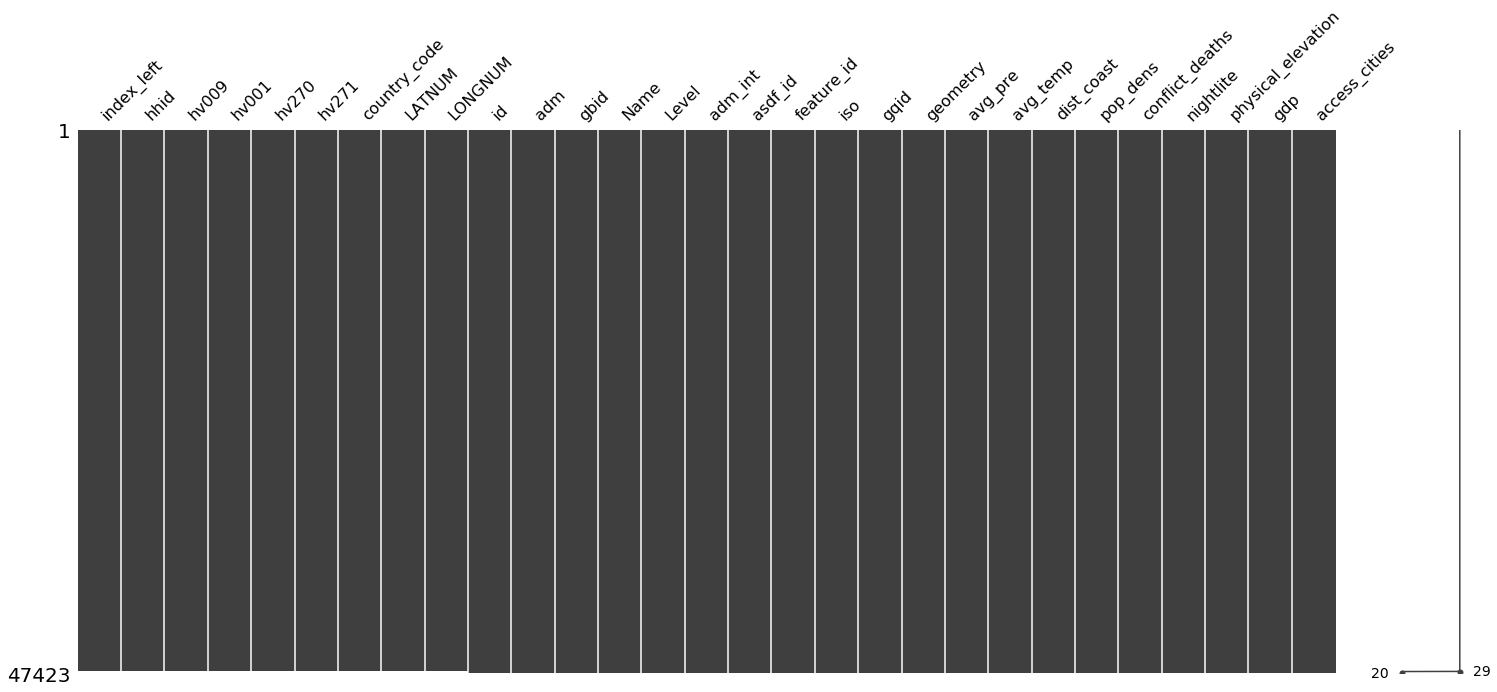

In [76]:
missingno.matrix(alternative);

In [78]:
alternative.head(4)

,index_left,hhid,hv009,hv001,hv270,hv271,country_code,LATNUM,LONGNUM,id,adm,gbid,Name,Level,adm_int,asdf_id,feature_id,iso,gqid,geometry,avg_pre,avg_temp,dist_coast,pop_dens,conflict_deaths,nightlite,physical_elevation,gdp,access_cities
index_right,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,20481.0,00620103,6.0,62.0,middle,-53093.0,TZ,-6.439537,38.883956,0,ADM2,TZA_ADM2_1_3_3_0,Bagamoyo,ADM2,2,0,0,TZA,0,"POLYGON ((38.16637 -6.68982, 38.16594 -6.68947...",72.890916,26.408804,49414.959752,25.266386,0.0,0.192784,228.443757,0.032569,125.102745
0,20463.0,00620018,3.0,62.0,richest,117955.0,TZ,-6.439537,38.883956,0,ADM2,TZA_ADM2_1_3_3_0,Bagamoyo,ADM2,2,0,0,TZA,0,"POLYGON ((38.16637 -6.68982, 38.16594 -6.68947...",72.890916,26.408804,49414.959752,25.266386,0.0,0.192784,228.443757,0.032569,125.102745
0,20439.0,00610003,7.0,61.0,richest,211976.0,TZ,-6.373430,38.586433,0,ADM2,TZA_ADM2_1_3_3_0,Bagamoyo,ADM2,2,0,0,TZA,0,"POLYGON ((38.16637 -6.68982, 38.16594 -6.68947...",72.890916,26.408804,49414.959752,25.266386,0.0,0.192784,228.443757,0.032569,125.102745
0,20438.0,00610002,6.0,61.0,richer,35872.0,TZ,-6.373430,38.586433,0,ADM2,TZA_ADM2_1_3_3_0,Bagamoyo,ADM2,2,0,0,TZA,0,"POLYGON ((38.16637 -6.68982, 38.16594 -6.68947...",72.890916,26.408804,49414.959752,25.266386,0.0,0.192784,228.443757,0.032569,125.102745


In [80]:
alternative.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 47423 entries, 0 to 908
Data columns (total 29 columns):
index_left            47267 non-null float64
hhid                  47267 non-null object
hv009                 47267 non-null float64
hv001                 47267 non-null float64
hv270                 47267 non-null object
hv271                 47267 non-null float64
country_code          47267 non-null object
LATNUM                47267 non-null float64
LONGNUM               47267 non-null float64
id                    47423 non-null object
adm                   47423 non-null object
gbid                  47423 non-null object
Name                  47423 non-null object
Level                 47423 non-null object
adm_int               47423 non-null int64
asdf_id               47423 non-null int64
feature_id            47423 non-null object
iso                   47423 non-null object
gqid                  47423 non-null int64
geometry              47423 non-null geometry


In [136]:
alternative = alternative.drop(columns='geometry', axis=1)

In [157]:
alternative_num = alternative.groupby("gbid").mean()

In [158]:
alternative_num.head(9)

,index_left,hv009,hv001,hv271,LATNUM,LONGNUM,adm_int,asdf_id,gqid,avg_pre,avg_temp,dist_coast,pop_dens,conflict_deaths,nightlite,physical_elevation,gdp,access_cities
gbid,,,,,,,,,,,,,,,,,,
KEN_ADM3_1_3_3_0,NaN,NaN,NaN,NaN,NaN,NaN,3,0,0,89.825002,19.841667,405215.978768,9275.445051,0.0,40.552669,1639.160980,42.306717,0.000000
KEN_ADM3_1_3_3_1,167.5,3.107143,7.000000,234963.785714,-1.276019,36.858857,3,1,1,89.825002,19.841667,406196.097951,20004.375072,0.0,38.857876,1629.287598,42.110160,0.000000
KEN_ADM3_1_3_3_10,1107.5,3.200000,42.000000,31964.700000,-4.096663,39.637394,3,10,10,88.266669,27.208334,2876.038648,2580.017890,0.7,6.936435,24.019517,5.874173,4.447103
KEN_ADM3_1_3_3_100,NaN,NaN,NaN,NaN,NaN,NaN,3,100,100,95.675782,19.349935,422483.885762,703.804695,0.0,0.780714,1882.582961,2.949391,13.866947
KEN_ADM3_1_3_3_101,862.0,3.103448,32.000000,31032.896552,-1.179889,36.725431,3,101,101,89.825002,19.841667,416893.147579,1113.222272,0.0,2.548423,1775.778149,6.611128,3.445928
KEN_ADM3_1_3_3_102,902.5,2.653846,33.538462,122366.288462,-1.196903,36.677965,3,102,102,88.126565,19.946355,430767.253718,887.615433,0.0,2.103174,1964.921007,4.757945,14.551571
KEN_ADM3_1_3_3_103,NaN,NaN,NaN,NaN,NaN,NaN,3,103,103,89.825002,19.841667,435898.318575,464.514130,0.0,1.075015,2085.740995,2.748307,18.474528
KEN_ADM3_1_3_3_104,777.0,3.851852,29.000000,23736.333333,-1.061886,36.651355,3,104,104,120.488682,17.264520,441247.684842,290.823709,0.0,0.455050,2341.298834,1.010707,33.220230
KEN_ADM3_1_3_3_105,4115.5,4.000000,158.000000,-57416.687500,4.218075,34.343536,3,105,105,30.169463,27.902067,947596.956855,7.142924,0.0,0.173166,627.294034,0.008914,462.445996


In [159]:
alternative_num.shape

(911, 18)

In [140]:
geo.shape

(911, 20)

In [160]:
alternative = alternative_num.reset_index()

In [161]:
alternative.head(1)

,gbid,index_left,hv009,hv001,hv271,LATNUM,LONGNUM,adm_int,asdf_id,gqid,avg_pre,avg_temp,dist_coast,pop_dens,conflict_deaths,nightlite,physical_elevation,gdp,access_cities
0,KEN_ADM3_1_3_3_0,NaN,NaN,NaN,NaN,NaN,NaN,3,0,0,89.825002,19.841667,405215.978768,9275.445051,0.0,40.552669,1639.16098,42.306717,0.0


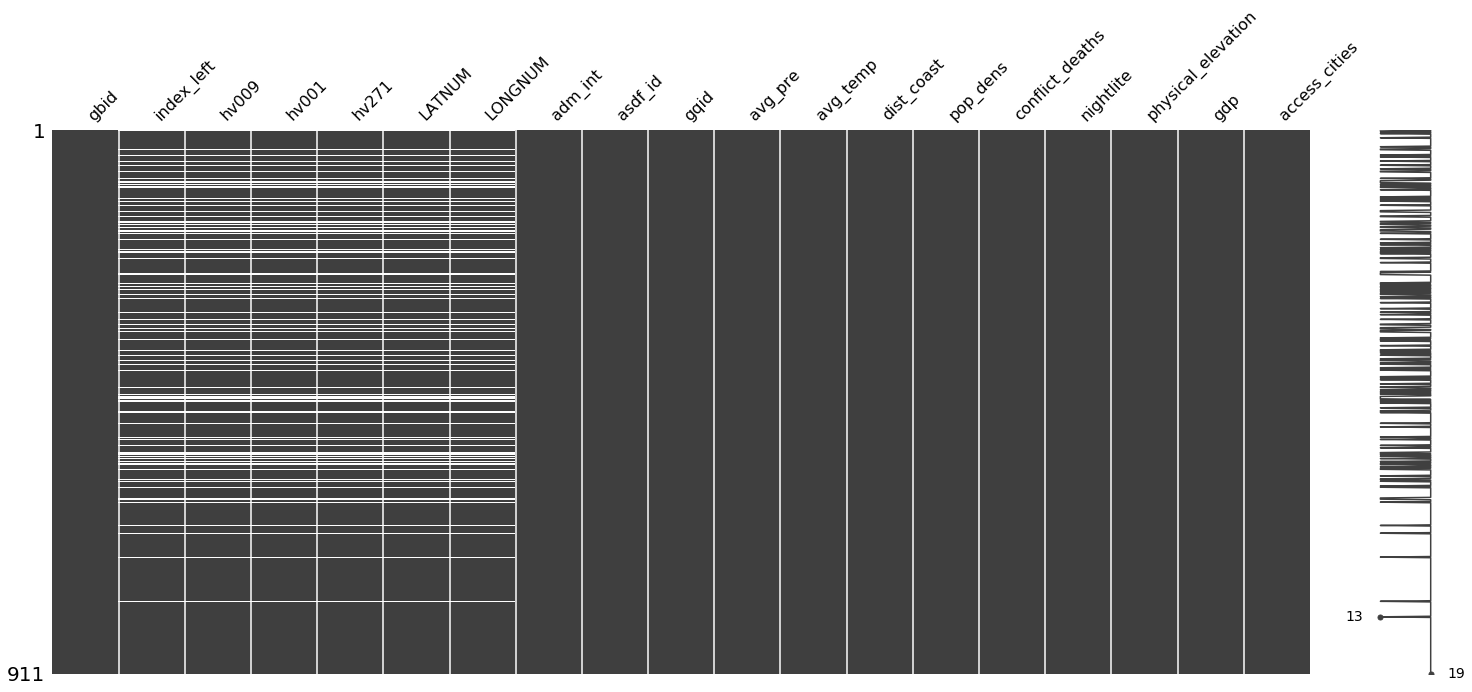

In [166]:
missingno.matrix(alternative)

In [162]:
alter_regions = pd.merge(geo,
                        alternative[['gbid', 'hv271']],
                        on='gbid',
                        how='left',
                        validate='1:1')

In [164]:
alter_regions.head(1)

,id,adm,gbid,Name,Level,adm_int,asdf_id,feature_id,iso,gqid,geometry,avg_pre,avg_temp,dist_coast,pop_dens,conflict_deaths,nightlite,physical_elevation,gdp,access_cities,hv271
0,0,ADM2,TZA_ADM2_1_3_3_0,Bagamoyo,ADM2,2,0,0,TZA,0,"POLYGON ((38.16637 -6.68982, 38.16594 -6.68947...",72.890916,26.408804,49414.959752,25.266386,0.0,0.192784,228.443757,0.032569,125.102745,74709.821705


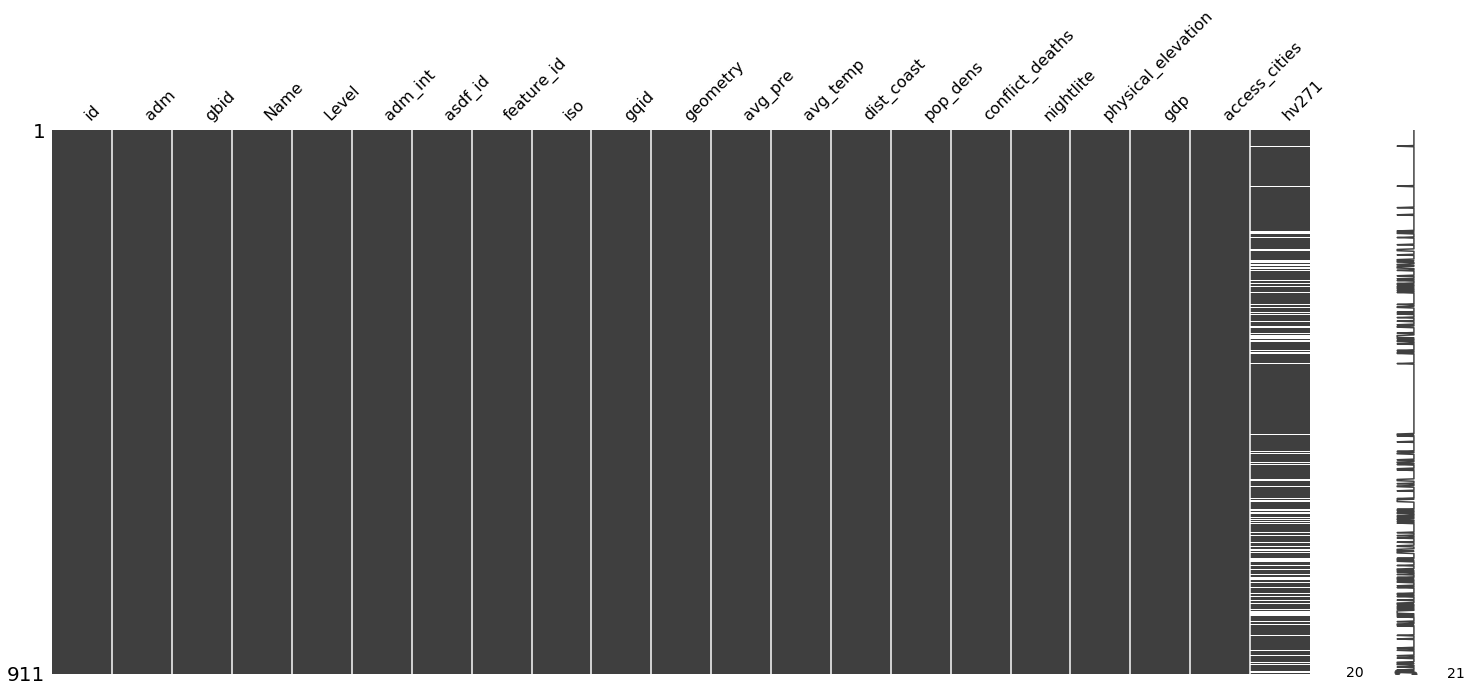

In [165]:
missingno.matrix(alter_regions)

In [167]:
alter_regions.shape

(911, 21)

In [168]:
alt_reg = alter_regions.dropna()

In [169]:
alt_reg.shape

(755, 21)

In [170]:
type(alt_reg)

geopandas.geodataframe.GeoDataFrame

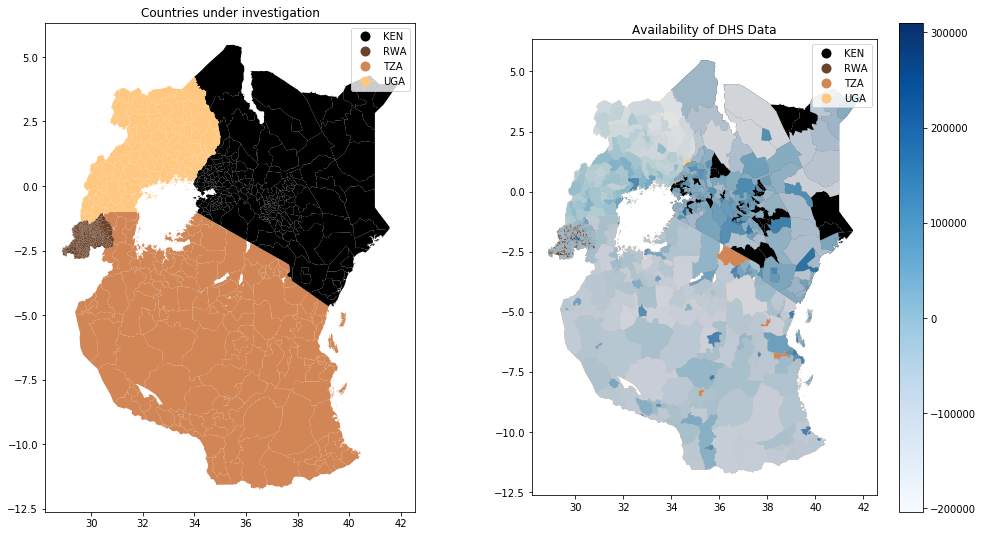

In [174]:
fix, ax = plt.subplots(ncols=2, figsize = (17,9))

geo.plot(ax=ax[0], column='iso', cmap='copper', legend=True)
ax[0].set_title('Countries under investigation')
##no shape file for the whole picture (all countries) found, therefore take the complete dataset geo:
geo.plot(ax=ax[1], column='iso', cmap='copper', legend=True)
alt_reg.plot(ax=ax[1], column='hv271', cmap='Blues', legend=True, alpha=0.85)
##draw in the regions kiva is active:
ax[1].set_title('Availability of DHS Data');

In [175]:
### Save dataframe for further work (modeling)
#### Convert to pandas dataframe and drop geometry:
alt_reg = pd.DataFrame(alt_reg.drop(columns='geometry'))
#### Save to file
alt_reg.to_csv(r'data/alt_reg.csv', index = False, header=True)